#**DM Final Project**

#**Team BingeCoders:**
- **Anupama Kurudi**
- **Gunjan Srivastava**
- **Krishna Jha**
- **Shivam Tomar**

#**Business Objective**

**Objective 1: To train the model to predict the house property price, square feet area and school popularity based on the inputs given**

**Objective 2: To find a Golden cluster with the properties that has high school popularity and the high square feet area with the less price for a good business use case**


##**Datasets**

Three datasets have been used for the project

**Base Dataset:** Real Estate dataset provided has been read from Google drive. The Texas state data has been collected as per the state given.

/content/drive/MyDrive/DM_Final_Project/Dataset_TX_1.csv 

**School Dataset:** Downloaded school dataset from Texas Government website.

/content/drive/MyDrive/DM_Final_Project/school_dataset.csv'

**Scraped Dataset:** It has been scraped from Zillow after three iterations.

##**Business Goal**

Predicting the investment properties for an inverstor who wants to buy a house for low price but with a higher square feet area and a good school rank. 

Finding the Golden cluster which signify that it has lowest costing house that has the highest school ranking. Relevant latent variables are taken into consideration.

The school ranking ranges from 1 to 100 where 1 means highest school and 100 means least popular.

##**Importing all the libraries required in the dataset**

In [ ]:
#Import python packages
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import io
import requests
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from scipy import stats
from google.colab import drive
import csv  
import seaborn as sns

##**Importing the base data and the school data**

**The datasets have been downloaded and uploaded on Google Drive from where it has been read.**

In [ ]:
data_scaled = drive.mount('/content/drive/')
base_dataset = pd.read_csv('/content/drive/MyDrive/DM_Final_Project/Dataset_TX_1.csv')
school_dataset = pd.read_csv('/content/drive/MyDrive/DM_Final_Project/school_dataset.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


##**CRISP-DM : Business Understanding**

Finding the Golden cluster of properties in the state of Texas that have low house prices and high school ranks.

##**CRISP-DM : Data Understanding**

Visualizing the base datasets and the school dataset to have better understanding of the data. This will give the clear picture of how sparse or dense the data is and how many null values we have in the datasets.

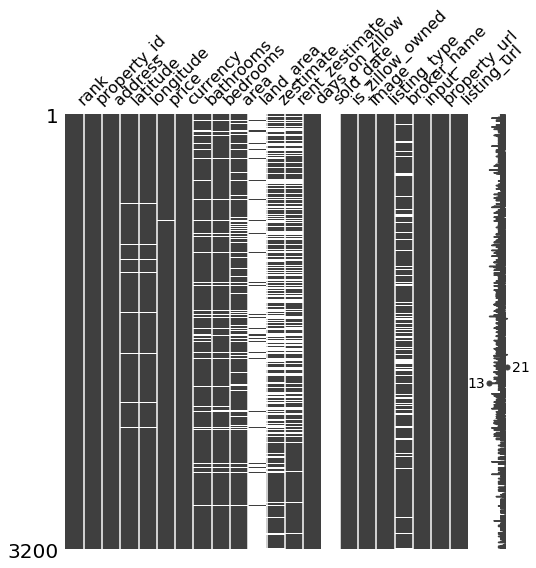

In [ ]:
import missingno as msno
msno.matrix(base_dataset,figsize=(8,8));

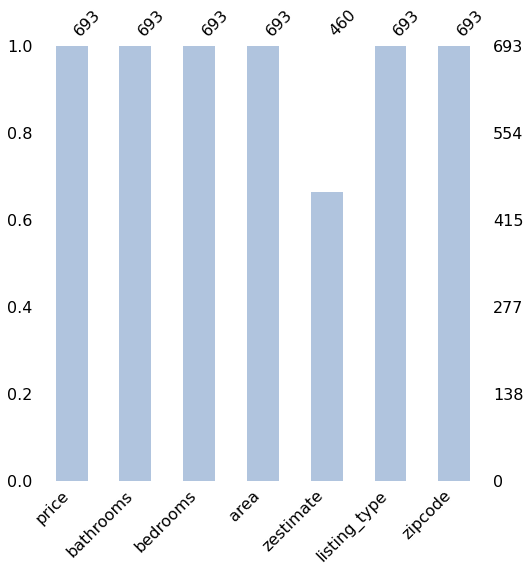

In [ ]:
msno.bar(base_dataset ,figsize=(8, 8), color='LightSteelBlue')

### Visualization for Texas School Dataset:

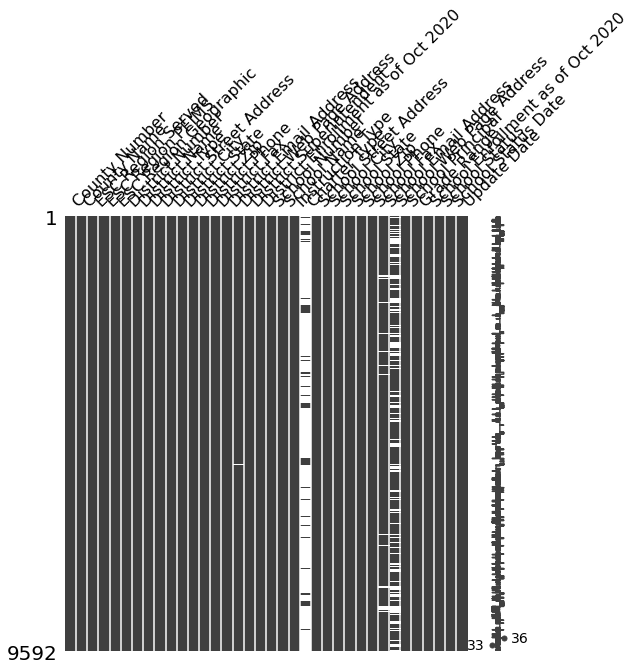

In [ ]:
msno.matrix(school_dataset,figsize=(8,8));

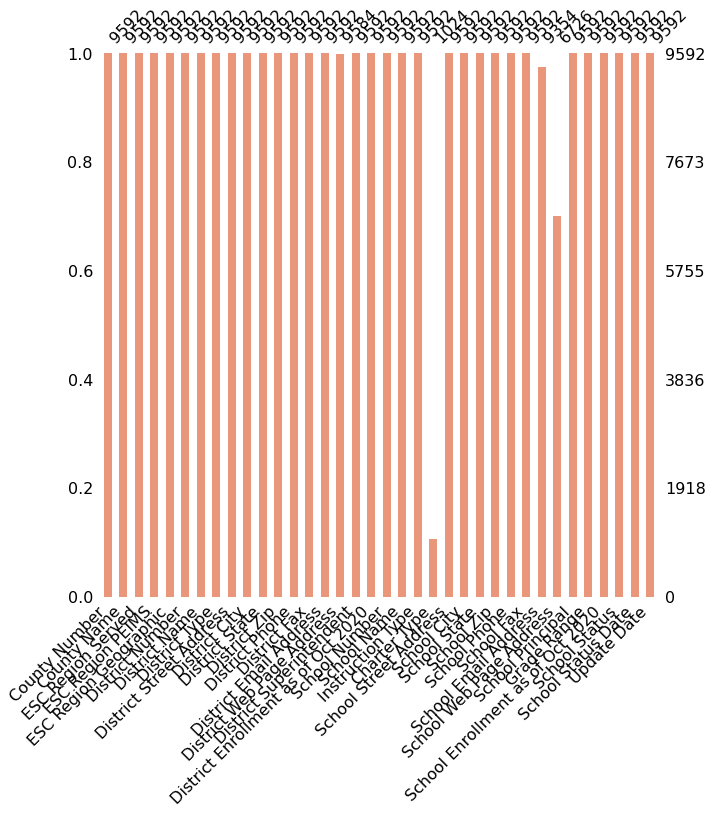

In [ ]:
msno.bar(school_dataset ,figsize=(10, 10), color='DarkSalmon')

##**CRISP-DM: Data Preparation**

In this step, we are performing data exploration and data cleaning to remove the null values, unnecessary columns and replacing values in a column with more meaningful data,etc.

##**Data Cleaning**



###**DataSet 1: Real Estate Texas**

**Cleaning the dataset of real estate**

In [ ]:
base_dataset.head(5)

,rank,property_id,address,latitude,longitude,price,currency,bathrooms,bedrooms,area,land_area,zestimate,rent_zestimate,days_on_zillow,sold_date,is_zillow_owned,image,listing_type,broker_name,input,property_url,listing_url
0,784,2067957778,"31119 Wyndfield Ct, Tomball, TX 77375",30.125583,-95.608875,372785.0,USD,2.0,4.0,2253.0 sqft,NaN,NaN,NaN,0.0,NaN,False,https://photos.zillowstatic.com/fp/19b8c1adba3...,New construction,"Turner Mangum,LLC",https://www.zillow.com/homes/TX_rb/,https://www.zillow.com/homedetails/31119-Wyndf...,https://www.zillow.com/homes/TX_rb/20_p/
1,48,123782868,"700 S 2nd St, Maquoketa, IA 52060",42.059788,-90.667110,45000.0,USD,1.0,1.0,1056.0 sqft,NaN,41100.0,827.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/da7fcd5464e...,House for sale,"eXp Realty, LLC",https://www.zillow.com/homes/IA_rb/,https://www.zillow.com/homedetails/700-S-2nd-S...,https://www.zillow.com/homes/IA_rb/2_p/
2,12,122492394,"8814 Preserve Trl, San Antonio, TX 78254",29.523676,-98.727346,292500.0,USD,3.0,4.0,2499.0 sqft,NaN,324100.0,2199.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/1fe8849b15f...,House for sale,The Ortiz Firm,https://www.zillow.com/homes/TX_rb/,https://www.zillow.com/homedetails/8814-Preser...,https://www.zillow.com/homes/TX_rb/
3,325,30113787,"13 Bushwick Rd, Poughkeepsie, NY 12603",41.666772,-73.835651,535000.0,USD,2.0,3.0,2500.0 sqft,NaN,332400.0,2600.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/b376ecbcd99...,House for sale,Listing by: C21 Alliance Realty Group Wf,https://www.zillow.com/homes/NY_rb/,https://www.zillow.com/homedetails/13-Bushwick...,https://www.zillow.com/homes/NY_rb/9_p/
4,365,768592,"3606 SW 38th St, Des Moines, IA 50321",41.550797,-93.670318,392500.0,USD,4.0,4.0,2335.0 sqft,NaN,386100.0,2282.0,1.0,NaN,False,https://photos.zillowstatic.com/fp/c9701176360...,House for sale,RE/MAX Concepts,https://www.zillow.com/homes/IA_rb/,https://www.zillow.com/homedetails/3606-SW-38t...,https://www.zillow.com/homes/IA_rb/10_p/


###**Dropping the columns which are not required for the use case**

In [ ]:
base_dataset = base_dataset.drop(['latitude','longitude', 'currency', 'land_area','rent_zestimate', 'days_on_zillow', 'sold_date', 'is_zillow_owned', 'image', 'broker_name',
                                  'input', 'property_url', 'listing_url', 'property_id', 'rank'],axis='columns')

base_dataset.head(5)

,address,price,bathrooms,bedrooms,area,zestimate,listing_type
0,"31119 Wyndfield Ct, Tomball, TX 77375",372785.0,2.0,4.0,2253.0 sqft,NaN,New construction
1,"700 S 2nd St, Maquoketa, IA 52060",45000.0,1.0,1.0,1056.0 sqft,41100.0,House for sale
2,"8814 Preserve Trl, San Antonio, TX 78254",292500.0,3.0,4.0,2499.0 sqft,324100.0,House for sale
3,"13 Bushwick Rd, Poughkeepsie, NY 12603",535000.0,2.0,3.0,2500.0 sqft,332400.0,House for sale
4,"3606 SW 38th St, Des Moines, IA 50321",392500.0,4.0,4.0,2335.0 sqft,386100.0,House for sale


###**Extracting the Zipcode and State from the address**

In [ ]:
base_dataset['zipcode'] = base_dataset['address'].str.split(',').str[2].str.split().str[1]
base_dataset['state'] = base_dataset['address'].str.split(',').str[2].str.split().str[0]
base_dataset

,address,price,bathrooms,bedrooms,area,zestimate,listing_type,zipcode,state
0,"31119 Wyndfield Ct, Tomball, TX 77375",372785.0,2.0,4.0,2253.0 sqft,NaN,New construction,77375,TX
1,"700 S 2nd St, Maquoketa, IA 52060",45000.0,1.0,1.0,1056.0 sqft,41100.0,House for sale,52060,IA
2,"8814 Preserve Trl, San Antonio, TX 78254",292500.0,3.0,4.0,2499.0 sqft,324100.0,House for sale,78254,TX
3,"13 Bushwick Rd, Poughkeepsie, NY 12603",535000.0,2.0,3.0,2500.0 sqft,332400.0,House for sale,12603,NY
4,"3606 SW 38th St, Des Moines, IA 50321",392500.0,4.0,4.0,2335.0 sqft,386100.0,House for sale,50321,IA
...,...,...,...,...,...,...,...,...,...
3195,"2660 E 13th Ave, Denver, CO 80206",650000.0,2.0,3.0,2193.0 sqft,650000.0,Multi-family home for sale,80206,CO
3196,"Evans Plan, The Summit Collection at Altaira a...",527000.0,3.0,4.0,2458.0 sqft,NaN,New construction,NaN,NaN
3197,"2143 Perry St, Denver, CO 80212",1370000.0,5.0,3.0,3200.0 sqft,1402800.0,Townhouse for sale,80212,CO
3198,"2276 S Sherman St, Denver, CO 80210",419900.0,2.0,2.0,1628.0 sqft,424800.0,Townhouse for sale,80210,CO


###**Once the state has been extracted, filtering out the rows for State Texas**

In [ ]:
base_dataset = base_dataset.loc[base_dataset['state'] == 'TX']
base_dataset.head(5)

,address,price,bathrooms,bedrooms,area,zestimate,listing_type,zipcode,state
0,"31119 Wyndfield Ct, Tomball, TX 77375",372785.0,2.0,4.0,2253.0 sqft,NaN,New construction,77375,TX
2,"8814 Preserve Trl, San Antonio, TX 78254",292500.0,3.0,4.0,2499.0 sqft,324100.0,House for sale,78254,TX
10,"211 Allegro Ct, Montgomery, TX 77316",449500.0,4.0,4.0,2616.0 sqft,389400.0,House for sale,77316,TX
13,"134 Brees Blvd, San Antonio, TX 78209",499000.0,2.0,3.0,1721.0 sqft,436000.0,House for sale,78209,TX
15,"LOT 33 Deer Oaks Dr, Pipe Creek, TX 78063",325000.0,2.0,3.0,1342.0 sqft,NaN,New construction,78063,TX


###**The total number of data for Texas is 771 out of 3200**

In [ ]:
base_dataset.shape

(771, 9)

###**Dropping the address once the state and zipcode have been extracted from it**

In [ ]:
base_dataset = base_dataset.drop(['address'],axis='columns')
base_dataset.head(2)

,price,bathrooms,bedrooms,area,zestimate,listing_type,zipcode,state
0,372785.0,2.0,4.0,2253.0 sqft,NaN,New construction,77375,TX
2,292500.0,3.0,4.0,2499.0 sqft,324100.0,House for sale,78254,TX


###**Removing the sqft unit from the area as it needs to be converted to integer value.**

In [ ]:
base_dataset['area'] = base_dataset['area'].str.split().str[0]
base_dataset.head(2)

,price,bathrooms,bedrooms,area,zestimate,listing_type,zipcode,state
0,372785.0,2.0,4.0,2253.0,NaN,New construction,77375,TX
2,292500.0,3.0,4.0,2499.0,324100.0,House for sale,78254,TX


###**Once features have been extracted, removing the column state**

In [ ]:
base_dataset = base_dataset.drop(columns={'state'})

In [ ]:
base_dataset.dtypes

price           float64
bathrooms       float64
bedrooms        float64
area             object
zestimate       float64
listing_type     object
zipcode          object
dtype: object

###**Calculating the null values that we have in the base dataset**

**We see that few columns have null values**

In [ ]:
base_dataset.isnull().sum()

price             0
bathrooms        75
bedrooms         69
area             72
zestimate       304
listing_type      0
zipcode           0
dtype: int64

###**Dropping the null values for subset of the columns**

In [ ]:
base_dataset = base_dataset.dropna(subset=['bedrooms', 'bathrooms', 'price', 'area'])
base_dataset.shape

(693, 7)

###**Converting the data types for the columns for better understandng and visualization**

In [ ]:
base_dataset['zipcode'] = base_dataset['zipcode'].astype(int)
base_dataset['bathrooms'] = base_dataset['bathrooms'].astype(int)
base_dataset['bedrooms'] = base_dataset['bedrooms'].astype(int)
base_dataset['price'] = base_dataset['price'].astype(int)
base_dataset['area'] = base_dataset['area'].astype(float)
base_dataset['area'] = base_dataset['area'].astype(int)

In [ ]:
base_dataset.shape

(693, 7)

###**Dataset 2 : School Dataset**

**Cleaning the school dataset to merge it on the base dataset**

In [ ]:
school_dataset.head(5)

,County Number,County Name,ESC Region Served,ESC Region PEIMS,ESC Region Geographic,District Number,District Name,District Type,District Street Address,District City,District State,District Zip,District Phone,District Fax,District Email Address,District Web Page Address,District Superintendent,District Enrollment as of Oct 2020,School Number,School Name,Instruction Type,Charter Type,School Street Address,School City,School State,School Zip,School Phone,School Fax,School Email Address,School Web Page Address,School Principal,Grade Range,School Enrollment as of Oct 2020,School Status,School Status Date,Update Date
0,'001,ANDERSON COUNTY,'07,'07,'07,'001902,CAYUGA ISD,INDEPENDENT,P O BOX 427,CAYUGA,TX,75832-0427,(903) 928-2102,(903) 928-2646,admin1@cayugaisd.com,www.cayugaisd.com,DR JOE E SATTERWHITE III,535,'001902001,CAYUGA H S,REGULAR INSTRUCTIONAL,NaN,P O BOX 427,CAYUGA,TX,75832-0427,(903) 928-2294 ext:012,(903) 928-2239,admin1@cayugaisd.com,www.cayugaisd.com,JAY THOMPSON,'09-12,166,Active,,10/10/2021 5:35:02 AM
1,'001,ANDERSON COUNTY,'07,'07,'07,'001902,CAYUGA ISD,INDEPENDENT,P O BOX 427,CAYUGA,TX,75832-0427,(903) 928-2102,(903) 928-2646,admin1@cayugaisd.com,www.cayugaisd.com,DR JOE E SATTERWHITE III,535,'001902041,CAYUGA MIDDLE,REGULAR INSTRUCTIONAL,NaN,P O BOX 427,CAYUGA,TX,75832-0427,(903) 928-2699,(903) 928-2646,admin1@cayugaisd.com,www.cayugaisd.com,MRS JENNI SCHEPPLER,'06-08,133,Active,03/11/1996,10/10/2021 5:35:02 AM
2,'001,ANDERSON COUNTY,'07,'07,'07,'001902,CAYUGA ISD,INDEPENDENT,P O BOX 427,CAYUGA,TX,75832-0427,(903) 928-2102,(903) 928-2646,admin1@cayugaisd.com,www.cayugaisd.com,DR JOE E SATTERWHITE III,535,'001902103,CAYUGA EL,REGULAR INSTRUCTIONAL,NaN,P O BOX 427,CAYUGA,TX,75832-0427,(903) 928-2295,(903) 928-2387,admin1@cayugaisd.com,www.cayugaisd.com,MRS TRACIE CAMPBELL,'EE-05,236,Active,,10/10/2021 5:35:02 AM
3,'001,ANDERSON COUNTY,'07,'07,'07,'001903,ELKHART ISD,INDEPENDENT,301 E PARKER ST,ELKHART,TX,75839-9701,(903) 764-2952,(903) 764-2466,rglenn@elkhartisd.org,www.elkhartisd.org,DR LAMONT SMITH,1200,'001903001,ELKHART H S,REGULAR INSTRUCTIONAL,NaN,301 E PARKER ST,ELKHART,TX,75839-9701,(903) 764-5161,(903) 764-2414,hneugebauer@elkhartisd.org,elkhartisd.org,MR JASON W IVES,'09-12,344,Active,,10/10/2021 5:35:02 AM
4,'001,ANDERSON COUNTY,'07,'07,'07,'001903,ELKHART ISD,INDEPENDENT,301 E PARKER ST,ELKHART,TX,75839-9701,(903) 764-2952,(903) 764-2466,rglenn@elkhartisd.org,www.elkhartisd.org,DR LAMONT SMITH,1200,'001903002,ELKHART DAEP,DAEP INSTRUCTIONAL,NaN,301 E PARKER ST,ELKHART,TX,75839,(903) 764-2952,(903) 764-2466,rglenn@elkhartisd.org,elkhartisd.org,,'KG-12,0,Active,06/28/2002,10/10/2021 5:35:02 AM


###**Extracting only two columns for amalgamation**

In [ ]:
school_data = school_dataset[['School Zip', 'School Enrollment as of Oct 2020']]
school_data.head(10)

,School Zip,School Enrollment as of Oct 2020
0,75832-0427,166
1,75832-0427,133
2,75832-0427,236
3,75839-9701,344
4,75839,0
5,75839-9701,268
6,75839-9701,322
7,75839-9701,266
8,75763-0428,223
9,75763-0428,200


###**Extracting zipcode from the string datatype**

In [ ]:
def extractZip(zipcode):
  z = zipcode.split('-')
  return z[0]

school_data['School Zip'] = school_data['School Zip'].str.split('-').str[0]
school_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,School Zip,School Enrollment as of Oct 2020
0,75832,166
1,75832,133
2,75832,236
3,75839,344
4,75839,0
...,...,...
9587,78839,346
9588,78839,281
9589,78839,384
9590,78872,223


###**Renaming all the column names for amalgamation based on zipcode**

In [ ]:
school_data = school_data.rename(columns={"School Zip":"zipcode" , "School Enrollment as of Oct 2020":"ranking"})
school_data.head(10)

,zipcode,ranking
0,75832,166
1,75832,133
2,75832,236
3,75839,344
4,75839,0
5,75839,268
6,75839,322
7,75839,266
8,75763,223
9,75763,200


###**Grouping the same zipcode and calculating the aggregate sum of the corresponding values**

In [ ]:
df_school = school_data.groupby(['zipcode']).agg(
    school_ranking = pd.NamedAgg(column="ranking", aggfunc=sum),
    zipcode =  pd.NamedAgg(column="zipcode", aggfunc=max)
)

df_school.reset_index(drop=True, inplace=True)
df_school

,school_ranking,zipcode
0,210,73672
1,169,73960
2,612,75001
3,18749,75002
4,10427,75006
...,...,...
1555,17652,79936
1556,15944,79938
1557,0,79975
1558,476,79998


###**Sorting the school_rank in the descending order**

In [ ]:
df_school = df_school.sort_values(['school_ranking'], ascending=[False])
df_school.head(5)

,school_ranking,zipcode
857,39436,77494
1182,38293,78572
1033,32919,78130
1168,31464,78540
1163,31333,78521


###**Reindexing the school rating from high to low in the range of 1 to n.** 

**1 being the highest and 100 being the lowest school popularity**

In [ ]:
df_school['school_rank'] = range(1, 1+len(df_school))
df_school = df_school.drop(columns=['school_ranking'])
df_school.head(5)

,zipcode,school_rank
857,77494,1
1182,78572,2
1033,78130,3
1168,78540,4
1163,78521,5


###**Converting the dtypes of the columns**

In [ ]:
df_school['school_rank'] = df_school['school_rank'].astype(int)
df_school['zipcode'] = df_school['zipcode'].astype(int)
df_school.dtypes

zipcode        int64
school_rank    int64
dtype: object

###**Checking the null values and the types of data that we have**

In [ ]:
df_school.isnull().sum()

zipcode        0
school_rank    0
dtype: int64

In [ ]:
df_school.shape

(1560, 2)

##**DataSet 3: Dataset Scraping using Beautiful Soup**

**Scraped the data from Zillow and scraped data in three iterations.**

**Extracted data for different listing types of properties and later amalgamated into the base dataset**

In [ ]:
import requests
from bs4 import BeautifulSoup as soup

###**Zillow url for extracting the House for Sale dataset**

In [ ]:
header = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.71 Safari/537.36',
    'referer': 'https://www.zillow.com/tx/house,land,townhouse_type/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22mapBounds%22%3A%7B%22west%22%3A-122.9723493125%2C%22east%22%3A-77.1813336875%2C%22south%22%3A26.21832355280932%2C%22north%22%3A36.15897703463119%7D%2C%22mapZoom%22%3A5%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A54%2C%22regionType%22%3A2%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22ah%22%3A%7B%22value%22%3Atrue%7D%2C%22con%22%3A%7B%22value%22%3Afalse%7D%2C%22apco%22%3A%7B%22value%22%3Afalse%7D%2C%22apa%22%3A%7B%22value%22%3Afalse%7D%2C%22manu%22%3A%7B%22value%22%3Afalse%7D%2C%22mf%22%3A%7B%22value%22%3Afalse%7D%7D%2C%22isListVisible%22%3Atrue%7D'
}
url = 'https://www.zillow.com/tx/house,land,townhouse_type/'
html = requests.get(url=url,headers=header)
html.status_code

200

In [ ]:
bsobj = soup(html.content,'lxml')


###**Extracting the area, bedrooms, bathrooms, listing types and price from the address class**

**Defining a function that extracts the bedrooms,bathrooms,price,area,and listing types from the list of data fetched from the zillow**

In [ ]:
def splitString(str, address):
  s1 = str.split('-')
  s2 = s1[0].split()
  s_price = s2[0][:-1]
  s1_price = s_price.replace(',','')
  s_bed = s2[0][-1]
  s_bath = s2[1][-1]
  s_sqft = s2[2][2:]
  s1_sqft = s_sqft.replace(',','')
  
  str = [s1_price, s_bed,  s_bath, s1_sqft, s1[1],address]
  return str

**Extracting the price listing from zillow for the properties of type: "House For Sale"**

In [ ]:
price_list = []

for price in bsobj.findAll('div',{'class':'list-card-heading'}):
    if(len(price)!=0):
      price_list.append(price.text)
price_list

['$364,9004 bds2 ba2,222 sqft- House for sale',
 '$420,9004 bds4 ba2,665 sqft- House for sale',
 '$242,9004 bds3 ba2,154 sqft- House for sale',
 '$384,9003 bds3 ba1,643 sqft- House for sale',
 '$285,9004 bds3 ba2,351 sqft- House for sale',
 '$344,9006 bds3 ba2,968 sqft- House for sale',
 '$574,9004 bds3 ba2,800 sqft- House for sale',
 '$293,9004 bds4 ba2,524 sqft- House for sale',
 '$284,3003 bds2 ba1,217 sqft- House for sale']

**Extracting the address listing from zillow for the properties of type: "House For Sale"**

In [ ]:
address = []
var = 'list-card-addr'
for adr in bsobj.findAll('address',{'class':'list-card-addr'}):
  x = adr.text
  sp = x.split(',')
  sp2 = sp[2].split()
  address.append(sp2[1])

interim_list = []
for i in range(len(price_list)):
    interim_list.append(splitString(price_list[i], address[i]))
interim_list


[['$364900', '4', '2', '2222', ' House for sale', '76009'],
 ['$420900', '4', '4', '2665', ' House for sale', '78130'],
 ['$242900', '4', '3', '2154', ' House for sale', '77515'],
 ['$384900', '3', '3', '1643', ' House for sale', '78602'],
 ['$285900', '4', '3', '2351', ' House for sale', '77407'],
 ['$344900', '6', '3', '2968', ' House for sale', '77379'],
 ['$574900', '4', '3', '2800', ' House for sale', '78641'],
 ['$293900', '4', '4', '2524', ' House for sale', '77469'],
 ['$284300', '3', '2', '1217', ' House for sale', '78163']]

**Converting the data into a csv file for the scraped data**

In [ ]:
header = ['price', 'bed', 'bath', 'sqft', 'listing_type','address']

with open('scrape_1.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)

    writer.writerow(header)

    writer.writerows(interim_list)

scraped_1 = pd.read_csv('scrape_1.csv')
scraped_1

,price,bed,bath,sqft,listing_type,address
0,$364900,4,2,2222,House for sale,76009
1,$420900,4,4,2665,House for sale,78130
2,$242900,4,3,2154,House for sale,77515
3,$384900,3,3,1643,House for sale,78602
4,$285900,4,3,2351,House for sale,77407
5,$344900,6,3,2968,House for sale,77379
6,$574900,4,3,2800,House for sale,78641
7,$293900,4,4,2524,House for sale,77469
8,$284300,3,2,1217,House for sale,78163


##**Scraping Second Iteration**

**Repeating the steps of First Iteration for scraping and extracting the property data for the listing type :"Townhouse For sale"**

In [ ]:
header1 = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.71 Safari/537.36',
    'referer': 'https://www.zillow.com/tx/townhomes/?'
}
url1 = 'https://www.zillow.com/tx/townhomes/?'
html1 = requests.get(url=url1,headers=header1)
html1.status_code

200

In [ ]:
bsobj1 = soup(html1.content,'lxml')


In [ ]:
price_list1 = []

for price in bsobj1.findAll('div',{'class':'list-card-heading'}):
    if(len(price)!=0):
      price_list1.append(price.text)
price_list1

['$469,9003 bds3 ba2,064 sqft- Townhouse for sale',
 '$323,2003 bds3 ba1,423 sqft- Townhouse for sale',
 '$315,8002 bds2 ba1,485 sqft- Townhouse for sale',
 '$504,9002 bds3 ba2,314 sqft- Townhouse for sale',
 '$399,9003 bds3 ba1,939 sqft- Townhouse for sale',
 '$323,9002 bds3 ba1,659 sqft- Townhouse for sale',
 '$369,9003 bds3 ba1,711 sqft- Townhouse for sale',
 '$439,9002 bds4 ba2,483 sqft- Townhouse for sale',
 '$411,9004 bds3 ba2,007 sqft- Townhouse for sale']

In [ ]:
address1 = []
var = 'list-card-addr'
for adr in bsobj1.findAll('address',{'class':'list-card-addr'}):
  x = adr.text
  sp = x.split(',')
  sp2 = sp[2].split()
  address1.append(sp2[1])

interim_list1 = []
for i in range(len(price_list1)):
    interim_list1.append(splitString(price_list1[i], address1[i]))
interim_list1


[['$469900', '3', '3', '2064', ' Townhouse for sale', '75075'],
 ['$323200', '3', '3', '1423', ' Townhouse for sale', '75074'],
 ['$315800', '2', '2', '1485', ' Townhouse for sale', '75080'],
 ['$504900', '2', '3', '2314', ' Townhouse for sale', '75209'],
 ['$399900', '3', '3', '1939', ' Townhouse for sale', '75035'],
 ['$323900', '2', '3', '1659', ' Townhouse for sale', '75243'],
 ['$369900', '3', '3', '1711', ' Townhouse for sale', '75023'],
 ['$439900', '2', '4', '2483', ' Townhouse for sale', '75001'],
 ['$411900', '4', '3', '2007', ' Townhouse for sale', '78660']]

**Extracted and coverted the data of second iteration into another csv file**

In [ ]:
header = ['price', 'bed', 'bath', 'sqft', 'listing_type','address']

with open('scrape_2.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)

    writer.writerow(header)

    writer.writerows(interim_list1)

scraped_2 = pd.read_csv('scrape_2.csv')
scraped_2

,price,bed,bath,sqft,listing_type,address
0,$469900,3,3,2064,Townhouse for sale,75075
1,$323200,3,3,1423,Townhouse for sale,75074
2,$315800,2,2,1485,Townhouse for sale,75080
3,$504900,2,3,2314,Townhouse for sale,75209
4,$399900,3,3,1939,Townhouse for sale,75035
5,$323900,2,3,1659,Townhouse for sale,75243
6,$369900,3,3,1711,Townhouse for sale,75023
7,$439900,2,4,2483,Townhouse for sale,75001
8,$411900,4,3,2007,Townhouse for sale,78660


##**Scraping Third Iteration**

**Repeating the steps of First Iteration for scraping and extracting the property data for the listing type :"sqft-Condo For sale"**

In [ ]:
header2 = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.71 Safari/537.36',
    'referer': 'https://www.zillow.com/tx/condos/?'
}
url2 = 'https://www.zillow.com/tx/condos/?'
html2 = requests.get(url=url2,headers=header2)
html2.status_code

200

In [ ]:
bsobj2 = soup(html2.content,'lxml')


In [ ]:
price_list2 = []

for price in bsobj2.findAll('div',{'class':'list-card-heading'}):
    if(len(price)!=0):
      price_list2.append(price.text)
price_list2

['$365,9003 bds3 ba1,308 sqft- Condo for sale',
 '$414,1004 bds4 ba2,170 sqft- Condo for sale',
 '$391,1002 bds2 ba1,516 sqft- Condo for sale',
 '$331,9004 bds4 ba2,498 sqft- Condo for sale',
 '$307,0003 bds3 ba1,600 sqft- Condo for sale',
 '$389,9003 bds3 ba1,302 sqft- Condo for sale',
 '$454,9003 bds2 ba1,583 sqft- Condo for sale',
 '$476,9002 bds3 ba1,450 sqft- Condo for sale',
 '$402,9005 bds3 ba2,582 sqft- Condo for sale']

In [ ]:
address2 = []

for adr in bsobj2.findAll('address',{'class':'list-card-addr'}):
  x = adr.text
  sp = x.split(',')
  sp2 = sp[2].split()
  address2.append(sp2[1])

interim_list2 = []
# print(price_list)
for i in range(len(price_list2)):
    interim_list2.append(splitString(price_list2[i], address2[i]))
interim_list2


[['$365900', '3', '3', '1308', ' Condo for sale', '78725'],
 ['$414100', '4', '4', '2170', ' Condo for sale', '78664'],
 ['$391100', '2', '2', '1516', ' Condo for sale', '78747'],
 ['$331900', '4', '4', '2498', ' Condo for sale', '76537'],
 ['$307000', '3', '3', '1600', ' Condo for sale', '76537'],
 ['$389900', '3', '3', '1302', ' Condo for sale', '78725'],
 ['$454900', '3', '2', '1583', ' Condo for sale', '78660'],
 ['$476900', '2', '3', '1450', ' Condo for sale', '75206'],
 ['$402900', '5', '3', '2582', ' Condo for sale', '76537']]

**Converting the scraped data for third iteration into the csv file**

In [ ]:
header = ['price', 'bed', 'bath', 'sqft', 'listing_type','address']

with open('scraped_3.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)

    writer.writerow(header)

    writer.writerows(interim_list2)
scraped_3 = pd.read_csv('scraped_3.csv')
scraped_3

,price,bed,bath,sqft,listing_type,address
0,$365900,3,3,1308,Condo for sale,78725
1,$414100,4,4,2170,Condo for sale,78664
2,$391100,2,2,1516,Condo for sale,78747
3,$331900,4,4,2498,Condo for sale,76537
4,$307000,3,3,1600,Condo for sale,76537
5,$389900,3,3,1302,Condo for sale,78725
6,$454900,3,2,1583,Condo for sale,78660
7,$476900,2,3,1450,Condo for sale,75206
8,$402900,5,3,2582,Condo for sale,76537


In [ ]:
scraped_data = pd.concat([scraped_1,scraped_2,scraped_3],axis=0)
scraped_data.head(2)

,price,bed,bath,sqft,listing_type,address
0,$364900,4,2,2222,House for sale,76009
1,$420900,4,4,2665,House for sale,78130


In [ ]:
scraped_data = scraped_data.reset_index(drop=True)

In [ ]:
scraped_data['price'] = scraped_data['price'].str.split('$').str[1]
scraped_data['price'] = scraped_data['price'].astype(int)


In [ ]:
scraped_data = scraped_data.rename(columns={"bed":"bedrooms" , "bath":"bathrooms","sqft":"area","address":"zipcode"})
scraped_data.shape

(27, 6)

In [ ]:
scraped_data.isnull().sum()

price           0
bedrooms        0
bathrooms       0
area            0
listing_type    0
zipcode         0
dtype: int64

In [ ]:
scraped_data.dtypes

price            int64
bedrooms         int64
bathrooms        int64
area             int64
listing_type    object
zipcode          int64
dtype: object

##**Merging Scraped Dataset into the Base Dataset**

###**First concating the scraped data into the base dataset by adding rows to it**

**We notice that more data has been data and the number of data increased to 720**

In [ ]:
base_scraped = pd.concat([base_dataset, scraped_data],axis=0)
base_scraped

,price,bathrooms,bedrooms,area,zestimate,listing_type,zipcode
0,372785,2,4,2253,NaN,New construction,77375
2,292500,3,4,2499,324100.0,House for sale,78254
10,449500,4,4,2616,389400.0,House for sale,77316
13,499000,2,3,1721,436000.0,House for sale,78209
15,325000,2,3,1342,NaN,New construction,78063
...,...,...,...,...,...,...,...
22,307000,3,3,1600,NaN,Condo for sale,76537
23,389900,3,3,1302,NaN,Condo for sale,78725
24,454900,2,3,1583,NaN,Condo for sale,78660
25,476900,3,2,1450,NaN,Condo for sale,75206


##**Feature Classification**

**Classified new feature based on the existing features**

**Introduced new feature "price per square feet area" based on the price and area**

In [ ]:
base_scraped['price_per_sqft'] = base_scraped['price']/base_scraped['area']
base_scraped

,price,bathrooms,bedrooms,area,zestimate,listing_type,zipcode,price_per_sqft
0,372785,2,4,2253,NaN,New construction,77375,165.461607
2,292500,3,4,2499,324100.0,House for sale,78254,117.046819
10,449500,4,4,2616,389400.0,House for sale,77316,171.827217
13,499000,2,3,1721,436000.0,House for sale,78209,289.947705
15,325000,2,3,1342,NaN,New construction,78063,242.175857
...,...,...,...,...,...,...,...,...
22,307000,3,3,1600,NaN,Condo for sale,76537,191.875000
23,389900,3,3,1302,NaN,Condo for sale,78725,299.462366
24,454900,2,3,1583,NaN,Condo for sale,78660,287.365761
25,476900,3,2,1450,NaN,Condo for sale,75206,328.896552


**Resetting the index**

In [ ]:
base_scraped = base_scraped.reset_index(drop=False)

In [ ]:
(base_scraped.price_per_sqft > 600).sum()
base_scraped.index.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
base_scraped = base_scraped[base_scraped.price_per_sqft < 600]

##**Data Distribution**

**Plotting the histogram to understand the data distribution**

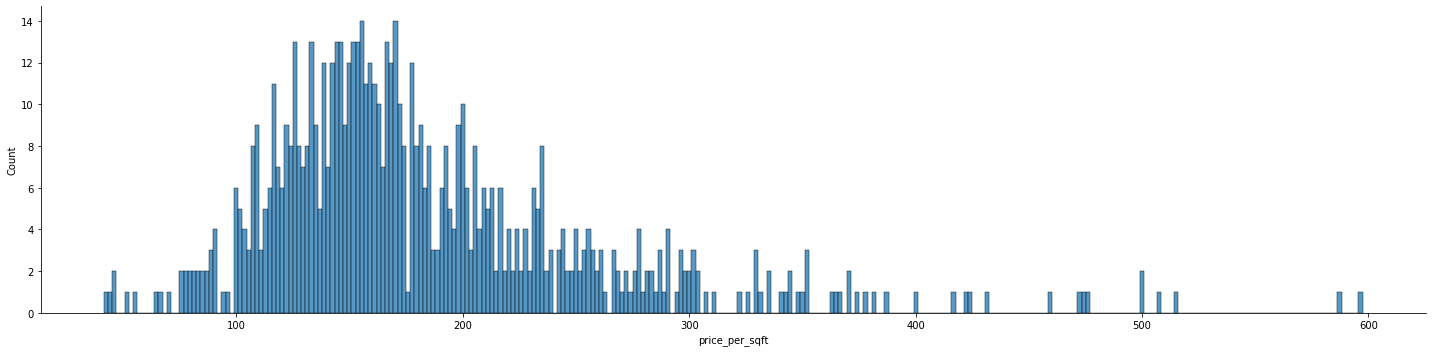

In [ ]:
import seaborn as sns

sns.displot(data = base_scraped, x = 'price_per_sqft', kind = 'hist', bins = 300, aspect = 4)

##**Merging School Dataset Into the Scraped and Base Dataset**

**After merging the scraped and base dataset, finally merging the school rank data into them based on the zipcode**

In [ ]:
merged_df = pd.merge(base_scraped, df_school, on='zipcode', how="left")
merged_df

,index,price,bathrooms,bedrooms,area,zestimate,listing_type,zipcode,price_per_sqft,school_rank
0,0,372785,2,4,2253,NaN,New construction,77375,165.461607,99.0
1,2,292500,3,4,2499,324100.0,House for sale,78254,117.046819,119.0
2,10,449500,4,4,2616,389400.0,House for sale,77316,171.827217,926.0
3,13,499000,2,3,1721,436000.0,House for sale,78209,289.947705,228.0
4,15,325000,2,3,1342,NaN,New construction,78063,242.175857,NaN
...,...,...,...,...,...,...,...,...,...,...
706,22,307000,3,3,1600,NaN,Condo for sale,76537,191.875000,650.0
707,23,389900,3,3,1302,NaN,Condo for sale,78725,299.462366,952.0
708,24,454900,2,3,1583,NaN,Condo for sale,78660,287.365761,21.0
709,25,476900,3,2,1450,NaN,Condo for sale,75206,328.896552,674.0


In [ ]:
merged_df.loc[merged_df['zipcode'] == 77091]

,index,price,bathrooms,bedrooms,area,zestimate,listing_type,zipcode,price_per_sqft,school_rank
161,607,372000,4,3,2213,357700.0,House for sale,77091,168.097605,383.0


In [ ]:
merged_df['school_rank'].isnull().sum()
merged_df.shape

(711, 10)

**Looking for the null values and dropping the values where the school rank is empty**

In [ ]:
merged_df = merged_df.dropna(subset=['school_rank'])
merged_df.shape

(676, 10)

##**Feature Importance using Gini Score**

In [ ]:
def gini(array):
    #array = array.flatten() #all values are treated equally, arrays must be 1d
    if np.amin(array) < 0:
        array -= np.amin(array) #values cannot be negative
    array += 0.0000001 #values cannot be 0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0]#number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient

gini_1 = gini(merged_df['price_per_sqft'])
gini_2 = gini(merged_df['school_rank'])
gini_3 = gini(merged_df['bedrooms'])
print("Gini Score for price per sqft Data: " , gini_1)
print("Gini Score for School Rank: " ,gini_2)
print("Gini Score for bedrooms: ",gini_3)

Gini Score for price per sqft Data:  0.2086807339313084
Gini Score for School Rank:  0.4813661640502885
Gini Score for bedrooms:  0.12614594775839225


**From the above result, we can see that the Gini score for the added latent variable is highest.**

**Gini Score for School Rank:  0.47689834744007775 which is highest than the non latent variables.**

##**Data Visualization**

###**Scatter Plot**

Text(0.5, 0.98, 'Categorical Plotting')

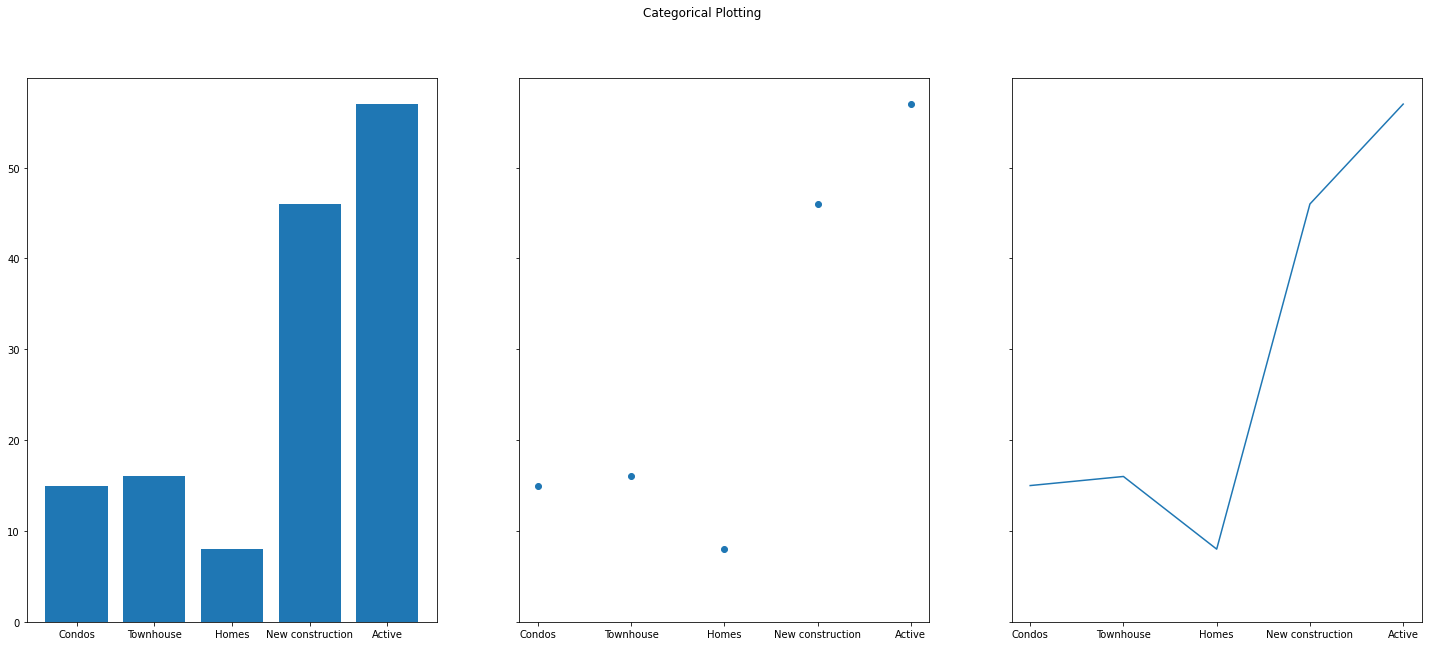

In [ ]:
import matplotlib.pyplot as plt
data = {'Condos': 15, 'Townhouse': 16, 'Homes' : 8, 'New construction': 46, 'Active' : 57}
names = list(data.keys())
values = list(data.values())
fig, axs = plt.subplots(1, 3, figsize=(25, 10), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

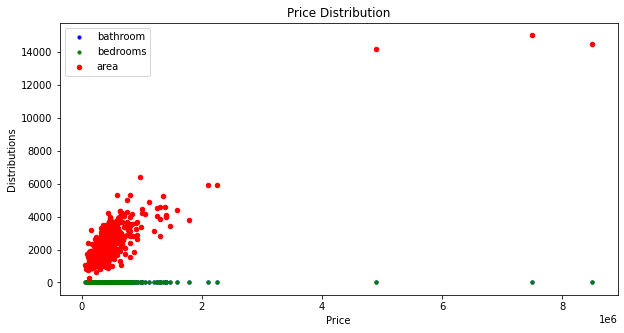

In [ ]:
def plot_scatter_chart(df):
    plt.rcParams['figure.figsize'] = (10,5)
    plt.scatter(merged_df.price,merged_df.bedrooms,color='blue',label='bathroom', s=10)
    plt.scatter(merged_df.price,merged_df.bedrooms, color='green',label='bedrooms', s=10)
    plt.scatter(merged_df.price,merged_df.area, color='red',label='area', s=20)
    plt.xlabel("Price")
    plt.ylabel("Distributions")
    plt.title("Price Distribution")
    plt.legend()
plot_scatter_chart(merged_df)

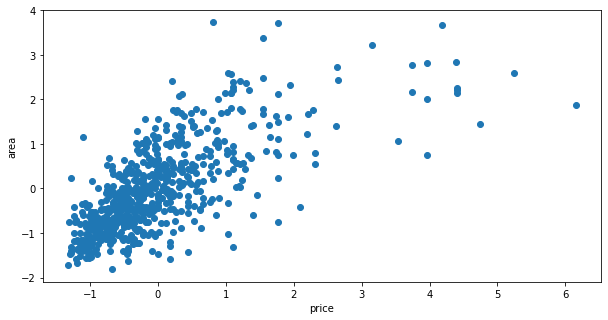

In [ ]:
from scipy import stats
data = merged_df.loc[merged_df['price'] > 0]
data = merged_df.loc[merged_df['price'] > 99999]
data_one = data[['price', 'area', 'bedrooms', 'bathrooms']]
data_cleaned = data_one[(np.abs(stats.zscore(data_one)) < 3).all(axis=1)]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)
plt.scatter(data_scaled[:,0],data_scaled[:,1])
plt.xlabel('price')
plt.ylabel('area')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


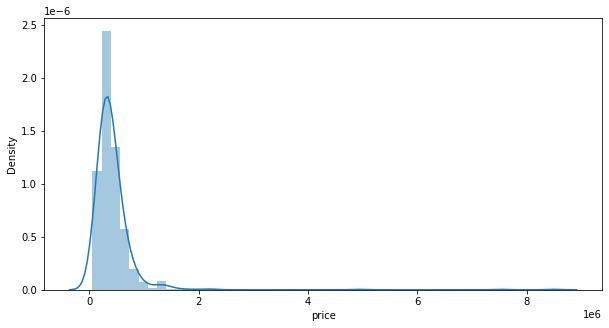

In [ ]:
sns.distplot(merged_df['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


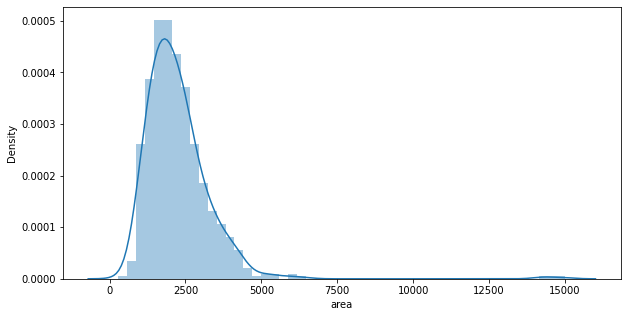

In [ ]:
sns.distplot(merged_df['area'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


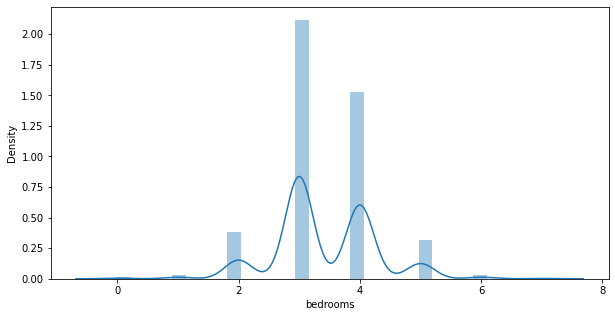

In [ ]:
sns.distplot(merged_df['bedrooms'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


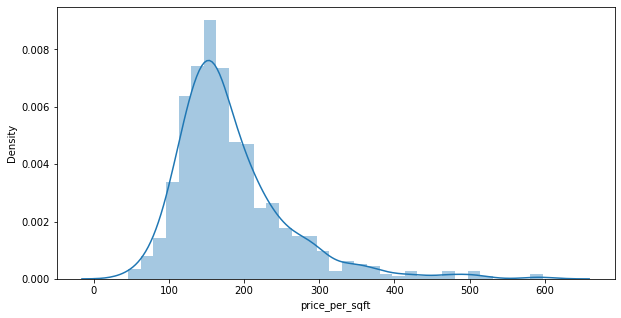

In [ ]:
sns.distplot(merged_df['price_per_sqft'])

###**Heat Map**

**Heat map showing the coorelation matrix**

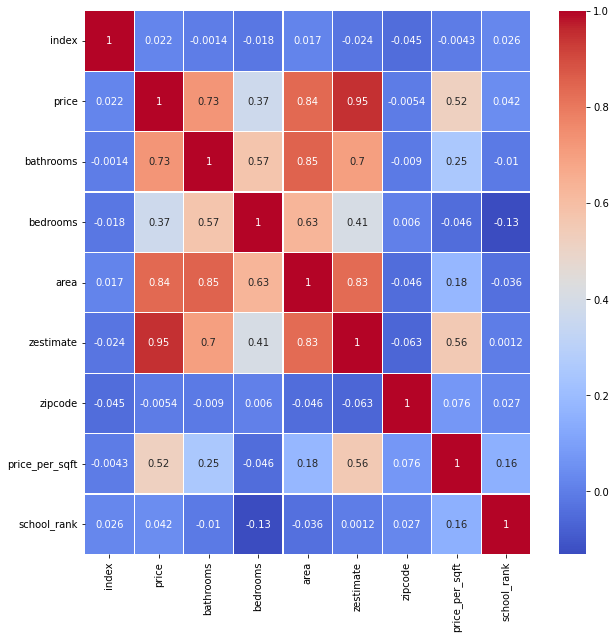

In [ ]:
merged_df.describe(include='all')
corr = merged_df.corr()
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corr, annot=True, linewidths=.25, ax=ax, cmap='coolwarm')

In [ ]:
merged_df.dtypes

index               int64
price               int64
bathrooms           int64
bedrooms            int64
area                int64
zestimate         float64
listing_type       object
zipcode             int64
price_per_sqft    float64
school_rank       float64
dtype: object

**Before normalizing the data, converting the school rank dtypes to int**

In [ ]:
merged_df['school_rank'] = merged_df['school_rank'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


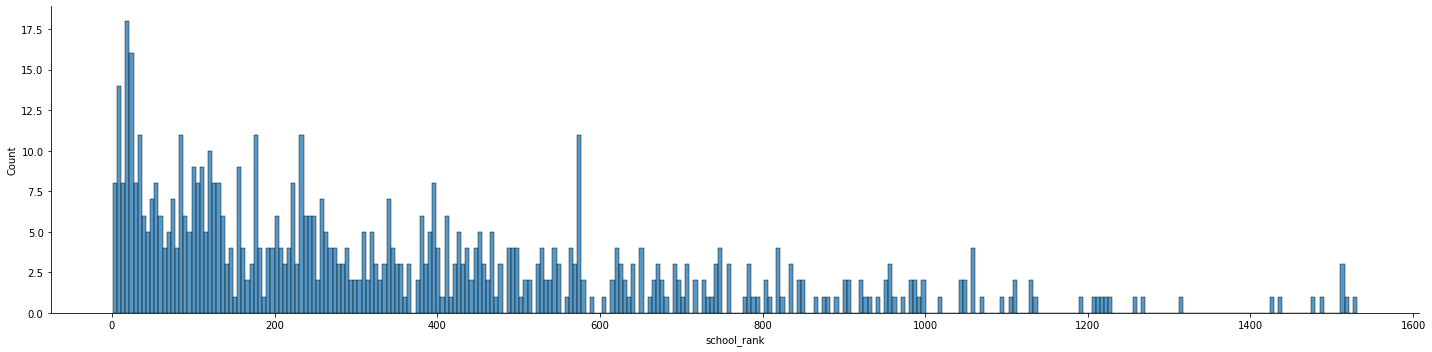

In [ ]:
import seaborn as sns
sns.displot(data = merged_df, x = 'school_rank', kind = 'hist', bins = 300, aspect = 4)

**Data distribution is varied too much, so we need to normalize it**

###**Normalization on Merged Dataset**

**Normalizing the latent variable that is school rank between the range of 1 to 100 as we can see that the data is ranging from 100 to 1400**

**1 being the most popular and 100 being the least popular**

In [ ]:
normalized_data = merged_df.copy()
max(normalized_data.school_rank)
min(normalized_data.school_rank)

1

In [ ]:
norm_col = ['school_rank']
normalized_data[norm_col] = normalized_data[norm_col].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [ ]:
normalized_data['school_rank'] = (normalized_data.school_rank * 99) + 1


**Normalized the school rank data and converted it into the range of 1 to 100 for better understanding and for more clear data variance**

In [ ]:
normalized_data

,index,price,bathrooms,bedrooms,area,zestimate,listing_type,zipcode,price_per_sqft,school_rank
0,0,372785,2,4,2253,NaN,New construction,77375,165.461607,7.341176
1,2,292500,3,4,2499,324100.0,House for sale,78254,117.046819,8.635294
2,10,449500,4,4,2616,389400.0,House for sale,77316,171.827217,60.852941
3,13,499000,2,3,1721,436000.0,House for sale,78209,289.947705,15.688235
5,26,595000,3,4,2700,568600.0,House for sale,75058,220.370370,60.464706
...,...,...,...,...,...,...,...,...,...,...
706,22,307000,3,3,1600,NaN,Condo for sale,76537,191.875000,42.994118
707,23,389900,3,3,1302,NaN,Condo for sale,78725,299.462366,62.535294
708,24,454900,2,3,1583,NaN,Condo for sale,78660,287.365761,2.294118
709,25,476900,3,2,1450,NaN,Condo for sale,75206,328.896552,44.547059


In [ ]:
max(normalized_data.school_rank)

100.0

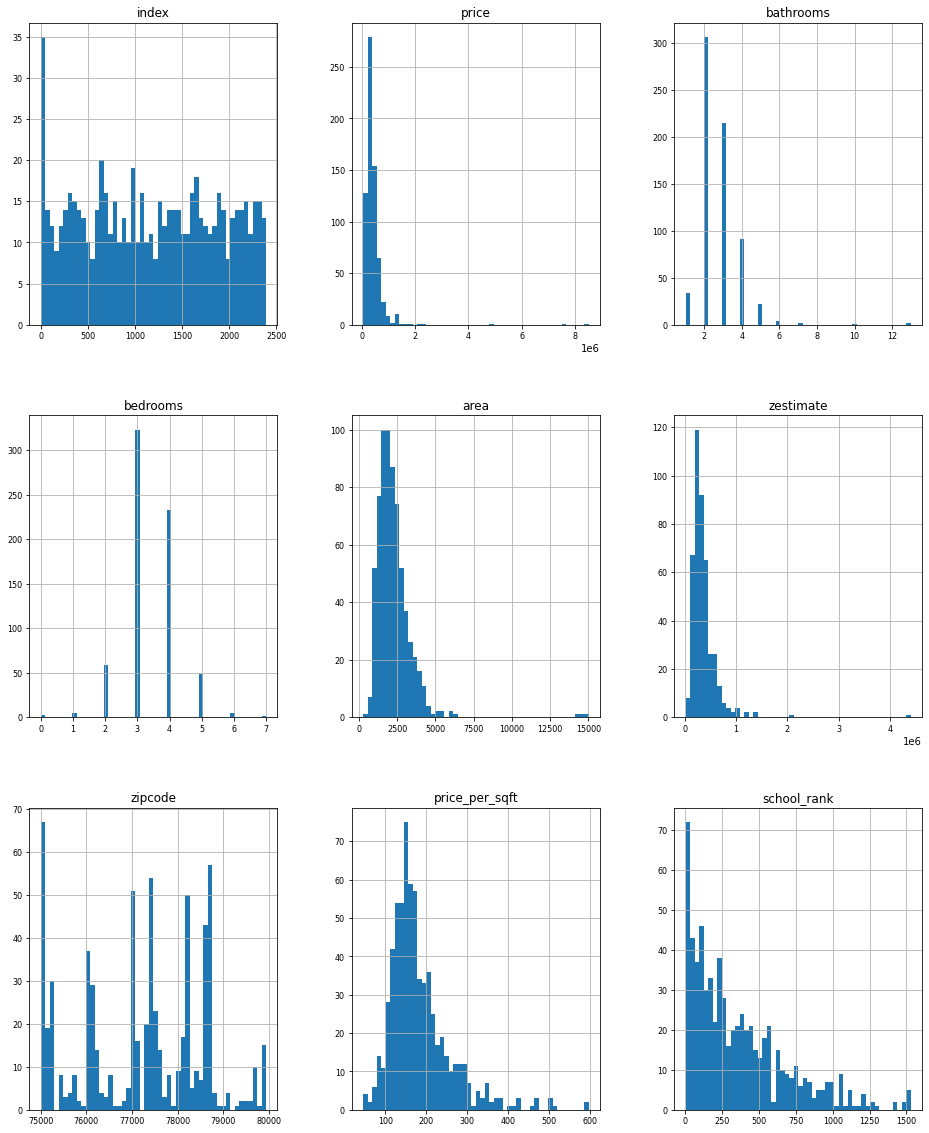

In [ ]:
temp_num = merged_df.select_dtypes(include = ['float64', 'int64'])
temp_num.head()
temp_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

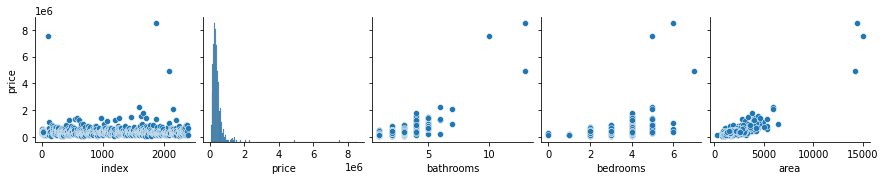

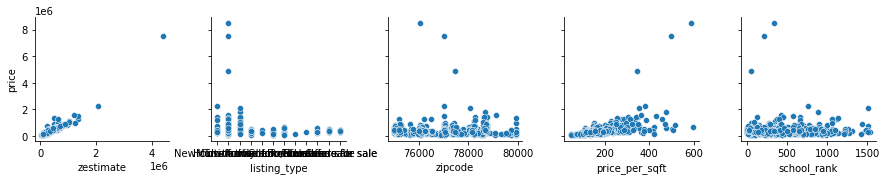

In [ ]:
ED3_num_corr = merged_df.corr()['price'][:-1] # -1 because the latest row is SalePrice
golden_features_list = ED3_num_corr[abs(ED3_num_corr) > 0.5].sort_values(ascending=False)
#print("There is {} strongly correlated values with ListPrice:\n{}".format(len(golden_features_list), golden_features_list))
for i in range(0, len(merged_df.columns), 5):
    sns.pairplot(data=merged_df,
                x_vars=merged_df.columns[i:i+5],
                y_vars=['price'])

##**PCA Dimensionality Reduction**

**Calculated the Eigen Vectors and Eigen Values to find the Dimensionality reduction**

In [ ]:
pca_df = merged_df.copy()
pca_df.describe()

,index,price,bathrooms,bedrooms,area,zestimate,zipcode,price_per_sqft,school_rank
count,676.000000,6.760000e+02,676.000000,676.000000,676.000000,4.380000e+02,676.000000,676.000000,676.000000
mean,1165.084320,4.301150e+05,2.715976,3.403846,2255.156805,3.620807e+05,77183.470414,183.340617,361.875740
std,715.096676,5.129521e+05,1.144046,0.836881,1214.153010,2.883718e+05,1366.168085,75.616243,325.680797
min,0.000000,5.700000e+04,1.000000,0.000000,283.000000,1.800000e+04,75001.000000,45.810755,1.000000
25%,540.750000,2.499742e+05,2.000000,3.000000,1560.000000,2.242250e+05,76052.000000,135.758762,104.000000
50%,1162.000000,3.495000e+05,2.000000,3.000000,2052.000000,3.099000e+05,77375.000000,165.613696,263.500000
75%,1777.500000,4.754750e+05,3.000000,4.000000,2666.000000,4.228000e+05,78254.250000,210.285265,532.500000
max,2394.000000,8.500000e+06,13.000000,7.000000,15021.000000,4.412800e+06,79938.000000,597.426471,1531.000000


In [ ]:
pca_df = pca_df[["zipcode","bathrooms", "bedrooms", "area","price","price_per_sqft","school_rank","zestimate"]]
pca_df

,zipcode,bathrooms,bedrooms,area,price,price_per_sqft,school_rank,zestimate
0,77375,2,4,2253,372785,165.461607,99,NaN
1,78254,3,4,2499,292500,117.046819,119,324100.0
2,77316,4,4,2616,449500,171.827217,926,389400.0
3,78209,2,3,1721,499000,289.947705,228,436000.0
5,75058,3,4,2700,595000,220.370370,920,568600.0
...,...,...,...,...,...,...,...,...
706,76537,3,3,1600,307000,191.875000,650,NaN
707,78725,3,3,1302,389900,299.462366,952,NaN
708,78660,2,3,1583,454900,287.365761,21,NaN
709,75206,3,2,1450,476900,328.896552,674,NaN


In [ ]:
X_variables = pca_df.iloc[:,0:7]
X_variables

,zipcode,bathrooms,bedrooms,area,price,price_per_sqft,school_rank
0,77375,2,4,2253,372785,165.461607,99
1,78254,3,4,2499,292500,117.046819,119
2,77316,4,4,2616,449500,171.827217,926
3,78209,2,3,1721,499000,289.947705,228
5,75058,3,4,2700,595000,220.370370,920
...,...,...,...,...,...,...,...
706,76537,3,3,1600,307000,191.875000,650
707,78725,3,3,1302,389900,299.462366,952
708,78660,2,3,1583,454900,287.365761,21
709,75206,3,2,1450,476900,328.896552,674


In [ ]:
y_variable = pca_df.iloc[:,7]
y_variable

0           NaN
1      324100.0
2      389400.0
3      436000.0
5      568600.0
         ...   
706         NaN
707         NaN
708         NaN
709         NaN
710         NaN
Name: zestimate, Length: 676, dtype: float64

In [ ]:
sc = StandardScaler()
transformed_df = sc.fit_transform(X_variables)

In [ ]:
covariance_matrix = np.cov(transformed_df.T)

In [ ]:
covariance_matrix

array([[ 1.00148148, -0.00900356,  0.00602073, -0.04635278, -0.00538995,
         0.07599698,  0.0274687 ],
       [-0.00900356,  1.00148148,  0.57420262,  0.85406803,  0.73001271,
         0.25221026, -0.01011775],
       [ 0.00602073,  0.57420262,  1.00148148,  0.63039135,  0.37078989,
        -0.04557254, -0.13138077],
       [-0.04635278,  0.85406803,  0.63039135,  1.00148148,  0.84105494,
         0.18192517, -0.03616588],
       [-0.00538995,  0.73001271,  0.37078989,  0.84105494,  1.00148148,
         0.52305392,  0.04233522],
       [ 0.07599698,  0.25221026, -0.04557254,  0.18192517,  0.52305392,
         1.00148148,  0.15566986],
       [ 0.0274687 , -0.01011775, -0.13138077, -0.03616588,  0.04233522,
         0.15566986,  1.00148148]])

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [ ]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
print('Eigenvalues arranged in descending order:')
for i in eigen_pairs:
    print(i[0])

Eigenvalues arranged in descending order:
3.1400494591907933
1.312630707586172
0.9952539903587824
0.8533722935155861
0.43423260371762823
0.05632602803524069
0.2185052879661709


In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca = pca.fit(transformed_df)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.44791492, 0.18724128, 0.14196882, 0.12172999, 0.06194146,
       0.03116887, 0.00803467])

###**Calculated the principal components and plotting them on a histogram**

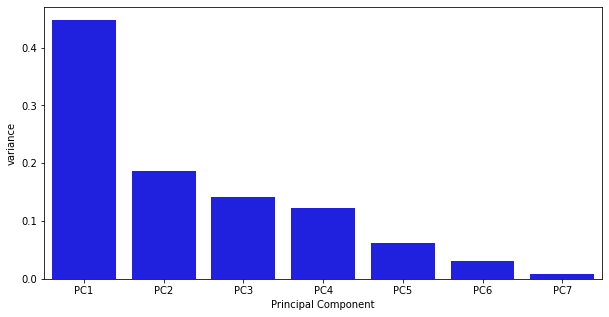

In [ ]:
dataframe = pd.DataFrame({'variance':pca.explained_variance_ratio_,
             'Principal Component':['PC1','PC2','PC3','PC4','PC5','PC6','PC7']})
sns.barplot(x='Principal Component',y="variance", 
           data=dataframe, color="b");

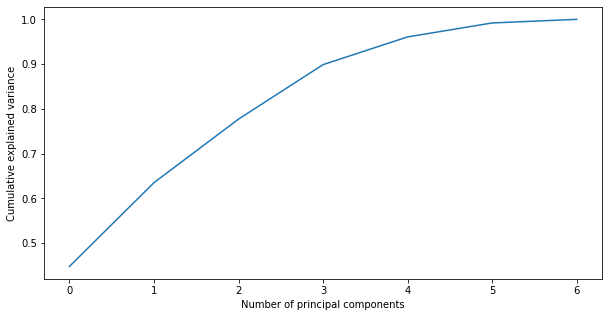

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [ ]:
pca_4 = PCA(n_components =4 )
pca_4 = pca_4.fit(transformed_df)
pca_4d = pca_4.transform(X_variables)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


**Based on the principal component values, we noticed that the few of the features can be removed**

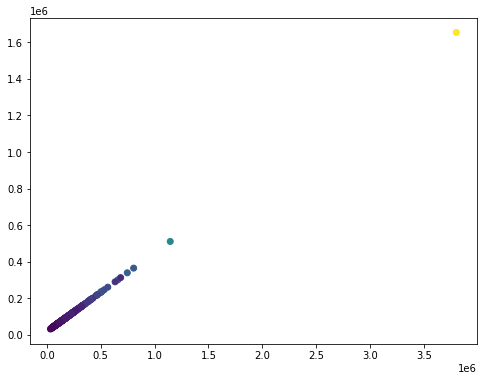

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(pca_4d[:,0], pca_4d[:,1],c=pca_df['zestimate'])
plt.show()

##**Golden Cluster**

**The objective is to find a Golden Cluster that satisfies the following constraints:**

**To estimate the house prices based on the square feet area**

**The price per square feet is to be minimized. This means the square feet area of the house needs to be maximized for the price that buyer is paying based on the school popularity.**

**The school rank with value 1 is the most popular school and with value 100 is least popular**


###**Applying K-Means Clustering Algorithm**

In [ ]:
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans

[[-0.23661913 -0.8077553 ]
 [-0.87736291 -0.74630001]
 [-0.15237368  1.73342113]
 ...
 [ 1.37671706 -1.04743095]
 [ 1.92635483  0.95908442]
 [-0.36128485  0.88533807]]


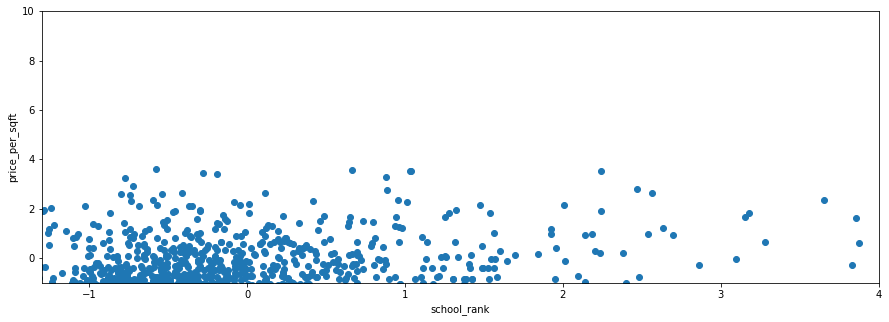

In [ ]:
extracted_data = normalized_data[['price_per_sqft', 'school_rank']]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(extracted_data)
print(data_scaled)
plt.rcParams['figure.figsize'] = (15,5)
plt.xlim(-1.3, 4)
plt.ylim(-1, 10)

plt.scatter(data_scaled[:,0],data_scaled[:,1])
plt.ylabel('price_per_sqft')
plt.xlabel('school_rank')

plt.show()

In [ ]:
sum_of_sq_dist = {}

for k in range(1,10):
  km = KMeans(n_clusters=k, init= 'k-means++', max_iter= 1000 )
  km = km.fit(extracted_data)
  sum_of_sq_dist[k] = km.inertia_

###**Elbow Method: to find number of clusters**

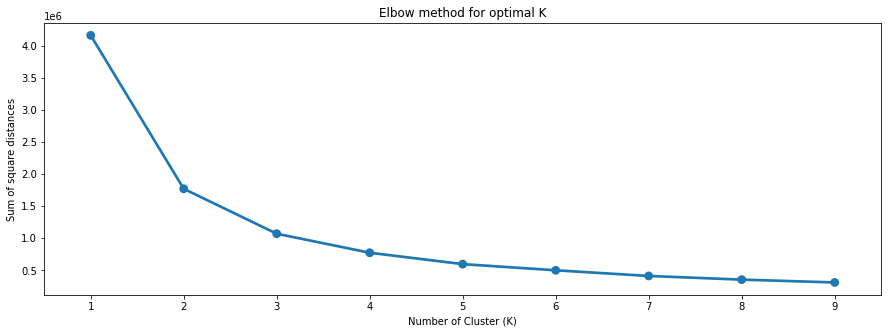

In [ ]:
sns.pointplot(x=list(sum_of_sq_dist.keys()), y= list(sum_of_sq_dist.values()))
plt.xlabel("Number of Cluster (K)")
plt.ylabel("Sum of square distances")
plt.title("Elbow method for optimal K")
plt.show()

###**Calculating the Silhoutte Score**

In [ ]:
#Find Silhouette Score

import sklearn.metrics as metrics
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.6014536040129033
For n_clusters = 3 The average silhouette_score is : 0.5003136344544034
For n_clusters = 4 The average silhouette_score is : 0.39654710239673363
For n_clusters = 5 The average silhouette_score is : 0.3843235298857143


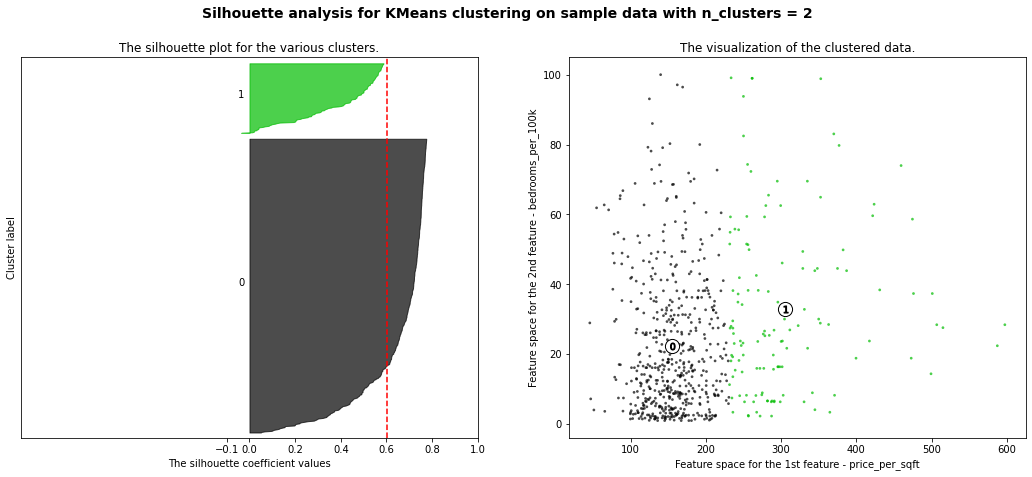

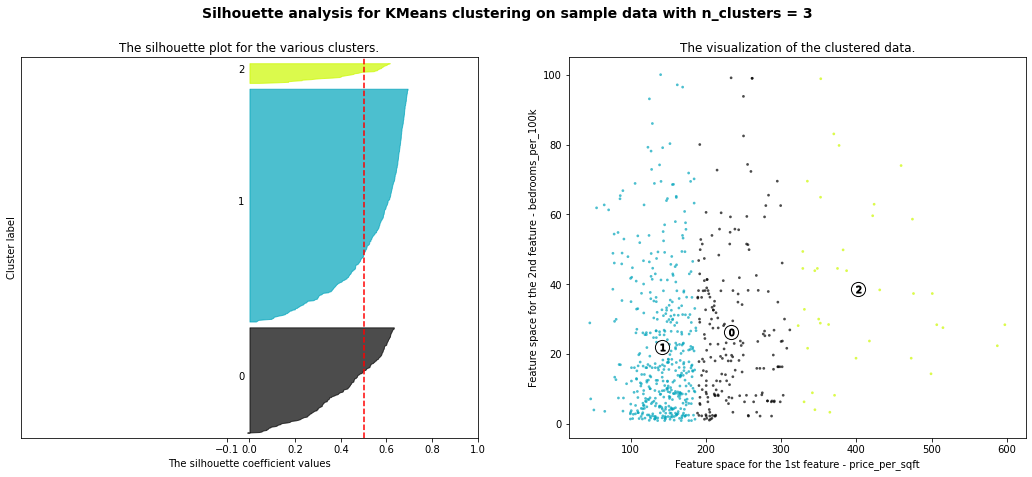

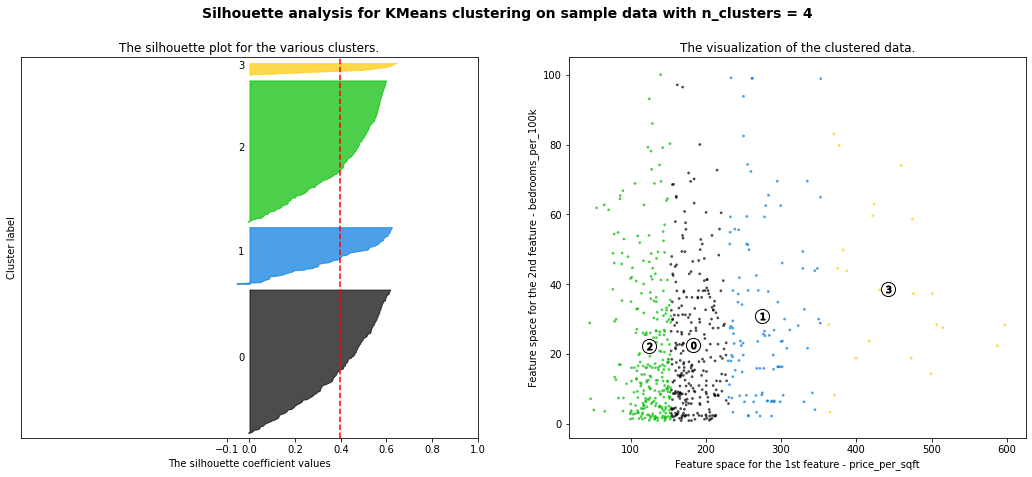

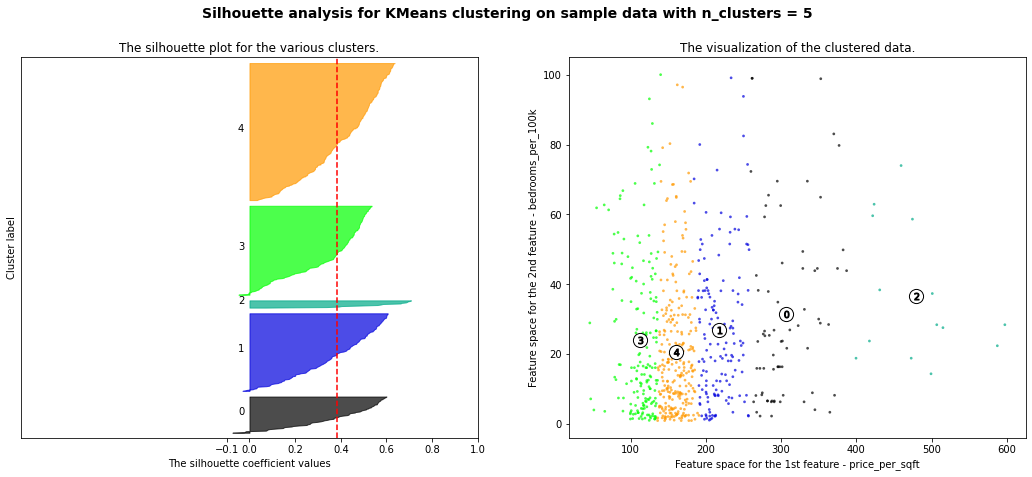

In [ ]:
range_n_clusters = [2, 3, 4, 5]
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-1, 1])
    
    ax1.set_ylim([0, len(extracted_data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    # clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    clusterer = KMeans(n_clusters=n_clusters, random_state= 10)
    cluster_labels = clusterer.fit_predict(extracted_data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(extracted_data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
     # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(extracted_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #print(data_cleaned)
    #print(type(data_cleaned))
    #data_final = data_cleaned.copy()
    #print(data_final.price)

    ax2.scatter(extracted_data.price_per_sqft, extracted_data.school_rank, marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    # ax2.set_xlim([0, 1400])
    # ax2.set_xticks([0, 200, 400, 600, 800, 1000, 1200, 1400])
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature - price_per_sqft")
    ax2.set_ylabel("Feature space for the 2nd feature - bedrooms_per_100k")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

The Elbow Graph shows that there is a significant drop from point 2 to point 3 and then continues to drop from there

The silhouette analysis shows that for n_clusters = 2, the average silhouette_score is : 0.594619586166531. The highest score and the the best choice in number of clusters.

Therefore the ideal number of clusters after this analysis is found to be 2.

In [ ]:
#Apply KMeans with number of clusters as 2
kmeans = KMeans(n_clusters=2)
cluster_labels = kmeans.fit_predict(extracted_data)
y_kmeans = kmeans.predict(extracted_data)

Text(0.5, 0.98, 'KMeans clustering on sample data with n_clusters = 2')

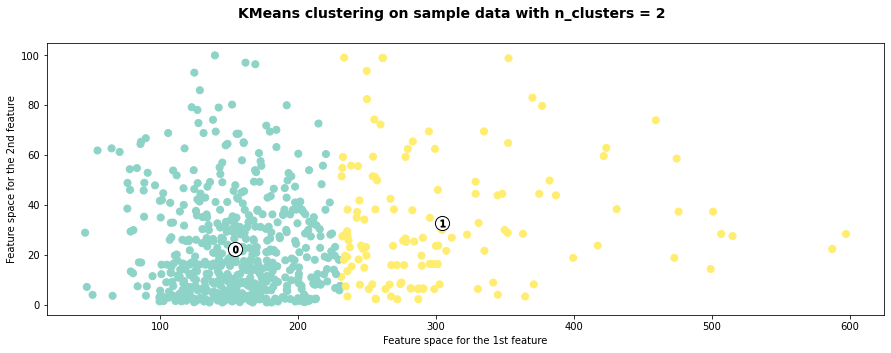

In [ ]:
plt.scatter(extracted_data.price_per_sqft, extracted_data.school_rank, c=y_kmeans, s=50, cmap='Set3')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
        # ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        plt.scatter(c[0], c[1], marker='$%d$' % i, s=50, alpha=1, edgecolor='k', );

plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")
plt.suptitle(("KMeans clustering on sample data "
                  "with n_clusters = 2"),
                 fontsize=14, fontweight='bold')
    

After performing the first iteration of the KMeans clustering, we obtain Cluster 1 and Cluster 0.

We need the golden cluster that is at the bottom left corner of the graph where we have low price per square feet for the most popular school based on the ranking.

Let us extract Cluster 1 and perform further clustering on it.

###**Seperating the two Clusters to extract only cluster 1 and perform clustering on it**

In [ ]:
extracted_data['cluster'] = cluster_labels

extracted_data0 = extracted_data.loc[extracted_data['cluster'] == 0]

extracted_data1 = extracted_data.loc[extracted_data['cluster'] == 1]

print(extracted_data0)
print(extracted_data1)

     price_per_sqft  school_rank  cluster
0        165.461607     7.341176        0
1        117.046819     8.635294        0
2        171.827217    60.852941        0
5        220.370370    60.464706        0
6        142.140468     9.541176        0
..              ...          ...      ...
701      205.231689     2.294118        0
703      190.829493     2.488235        0
705      132.866293    42.994118        0
706      191.875000    42.994118        0
710      156.041828    42.994118        0

[546 rows x 3 columns]
     price_per_sqft  school_rank  cluster
3        289.947705    15.688235        1
10       364.841849     3.394118        1
28       499.300979    14.394118        1
35       272.133527     2.294118        1
38       263.554217     6.370588        1
..              ...          ...      ...
692      233.607231    99.094118        1
702      279.740061    62.535294        1
707      299.462366    62.535294        1
708      287.365761     2.294118        1
709      3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Considering only Cluster 1:**

In [ ]:
sum_of_sq_dist1 = {}

for k in range(1,10):
  km = KMeans(n_clusters=k, init= 'k-means++', max_iter= 1000 )
  km = km.fit(extracted_data1)
  sum_of_sq_dist1[k] = km.inertia_

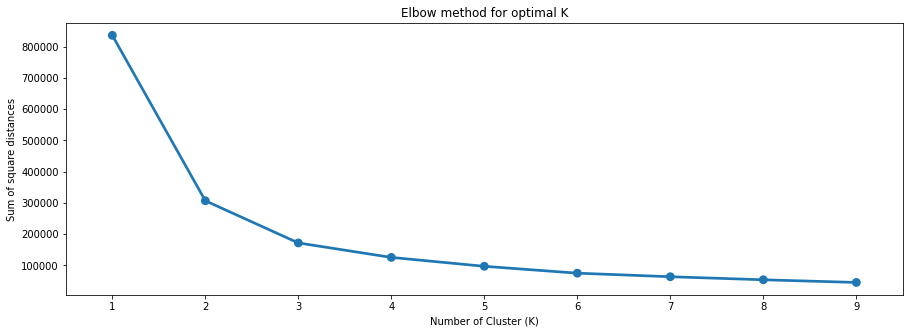

In [ ]:
sns.pointplot(x=list(sum_of_sq_dist1.keys()), y= list(sum_of_sq_dist1.values()))
plt.xlabel("Number of Cluster (K)")
plt.ylabel("Sum of square distances")
plt.title("Elbow method for optimal K")
plt.show()

**From the Elbow graph we find that the ideal number of clusters is 2**

For n_clusters = 2 The average silhouette_score is : 0.6286345800754086
For n_clusters = 3 The average silhouette_score is : 0.5463161353372195
For n_clusters = 4 The average silhouette_score is : 0.40892796755538846
For n_clusters = 5 The average silhouette_score is : 0.4432526671188802
For n_clusters = 6 The average silhouette_score is : 0.42224097578573383


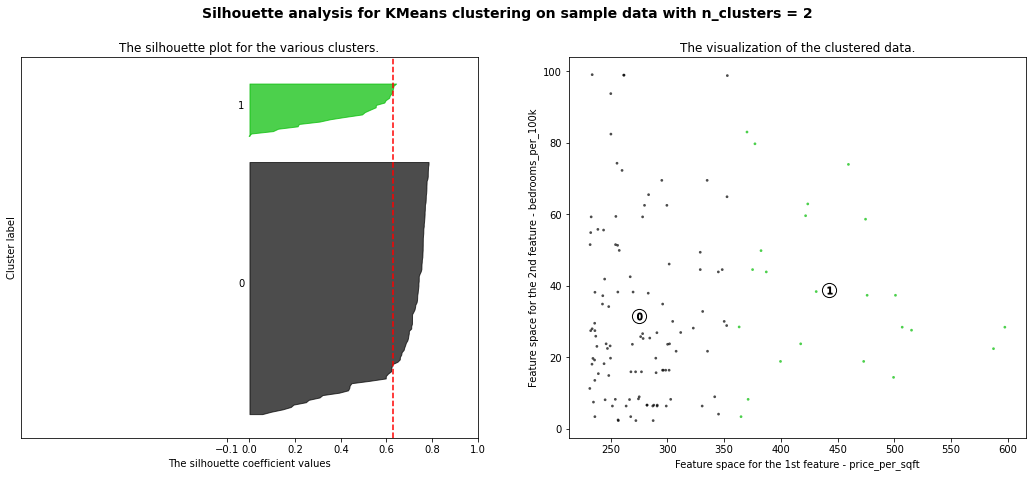

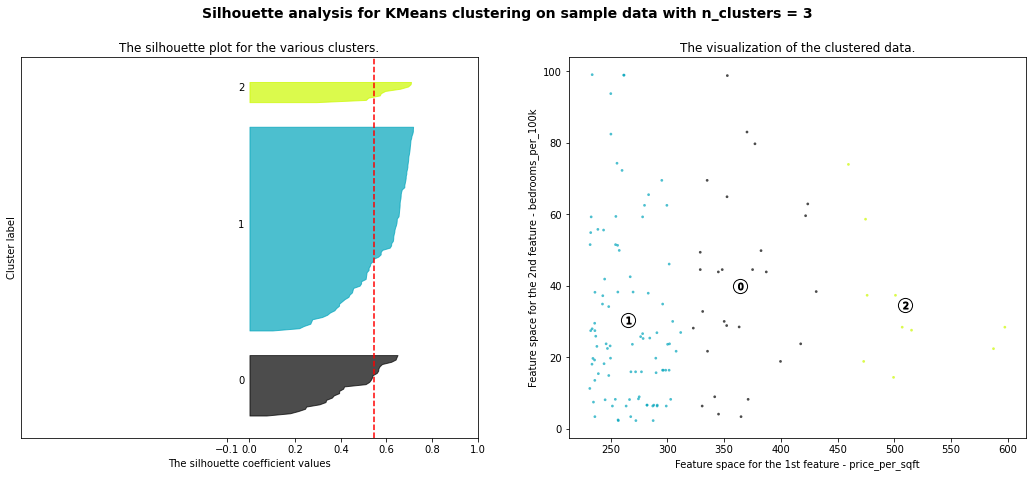

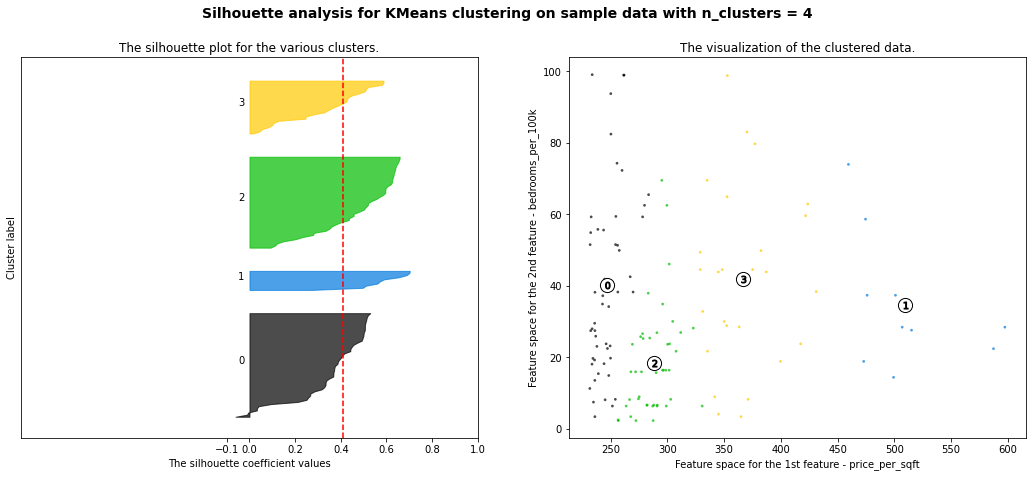

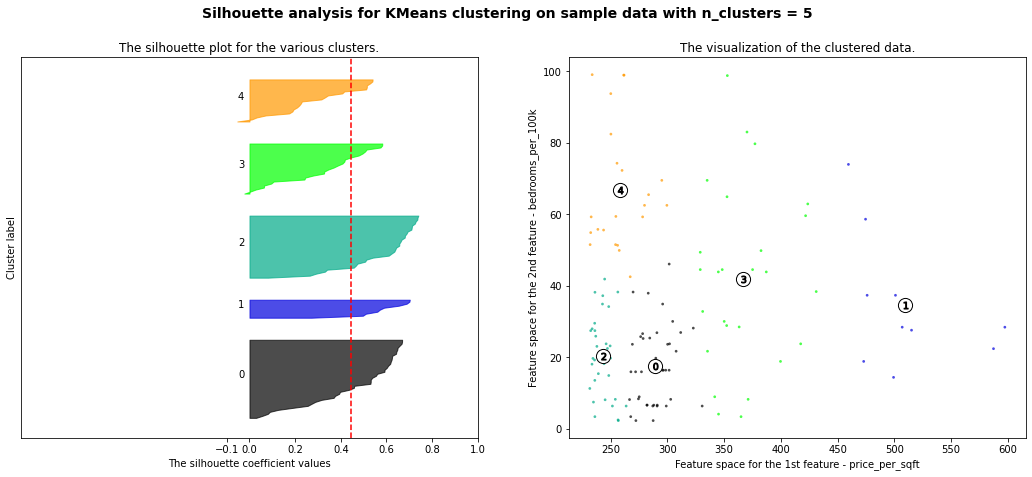

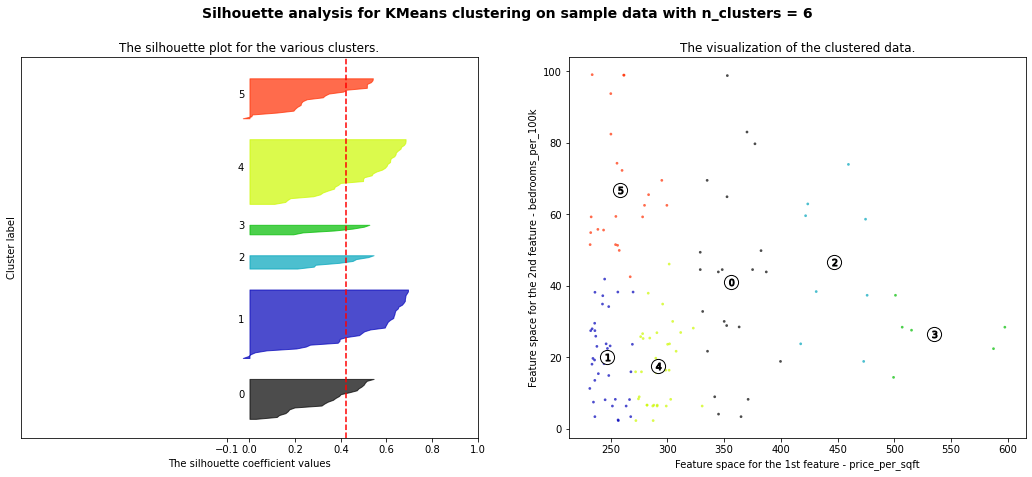

In [ ]:
# Selecting number of clusters through the silhouette analysis on Kmeans clustering
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-1, 1])
    
    ax1.set_ylim([0, len(extracted_data1) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(extracted_data1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(extracted_data1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
     # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(extracted_data1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

    ax2.scatter(extracted_data1.price_per_sqft, extracted_data1.school_rank, marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature - price_per_sqft")
    ax2.set_ylabel("Feature space for the 2nd feature - bedrooms_per_100k")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

We find that the best Silhouette score = 0.4124687915434243 is for number of clusters = 2.

In [ ]:
#Apply KMeans with number of clusters as 2
kmeans = KMeans(n_clusters=2)
cluster_labels = kmeans.fit_predict(extracted_data1)
y_kmeans1 = kmeans.predict(extracted_data1)

Text(0.5, 0.98, 'KMeans clustering on sample data with n_clusters = 2')

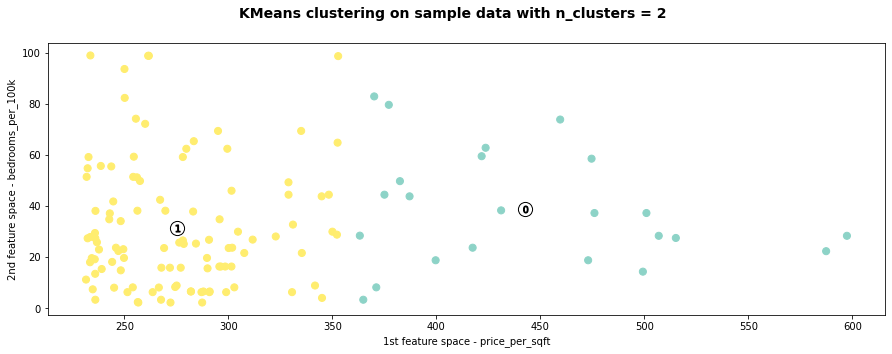

In [ ]:
plt.scatter(extracted_data1.price_per_sqft, extracted_data1.school_rank, c=y_kmeans1, s=50, cmap='Set3')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
        # ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        plt.scatter(c[0], c[1], marker='$%d$' % i, s=50, alpha=1, edgecolor='k', );

plt.xlabel("1st feature space - price_per_sqft")
plt.ylabel("2nd feature space - bedrooms_per_100k")
plt.suptitle(("KMeans clustering on sample data "
                  "with n_clusters = 2"),
                 fontsize=14, fontweight='bold')

In [ ]:
extracted_data1['cluster'] = cluster_labels

extracted_data10 = extracted_data1.loc[extracted_data1['cluster'] == 0]

extracted_data11 = extracted_data1.loc[extracted_data1['cluster'] == 1]

print(extracted_data10)
print(extracted_data11)

     price_per_sqft  school_rank  cluster
10       364.841849     3.394118        0
28       499.300979    14.394118        0
59       421.764706    59.623529        0
78       371.090448     8.247059        0
116      476.011994    37.364706        0
117      370.090635    83.047059        0
150      459.526334    73.988235        0
237      501.004016    37.364706        0
301      387.096774    43.900000        0
341      417.432150    23.776471        0
368      597.426471    28.435294        0
390      506.928407    28.435294        0
403      423.674912    62.923529        0
406      431.120211    38.400000        0
434      375.017206    44.547059        0
447      382.467423    49.852941        0
460      363.179534    28.500000        0
475      474.616605    58.652941        0
489      515.151515    27.594118        0
502      472.972973    18.858824        0
510      399.636694    18.858824        0
527      587.422253    22.417647        0
578      377.114428    79.747059  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Lets consider extracted_data11 as it is has values more close to the ideal values of a Golden Cluster.

In [ ]:
#Performing Clustering on Cluster number 1
#Finding ideal number of cluster with Elbow and Silhouette Scores

sum_of_sq_dist2 = {}

for k in range(1,10):
  km = KMeans(n_clusters=k, init= 'k-means++', max_iter= 1000 )
  km = km.fit(extracted_data11)
  sum_of_sq_dist2[k] = km.inertia_

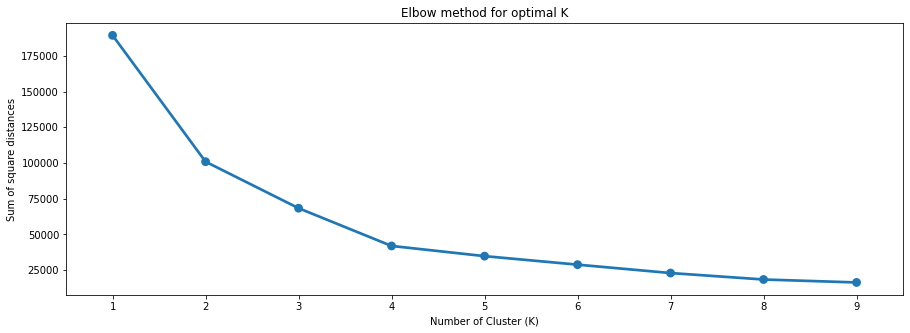

In [ ]:
sns.pointplot(x=list(sum_of_sq_dist2.keys()), y= list(sum_of_sq_dist2.values()))
plt.xlabel("Number of Cluster (K)")
plt.ylabel("Sum of square distances")
plt.title("Elbow method for optimal K")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.4147938716770212
For n_clusters = 3 The average silhouette_score is : 0.39330801137883536
For n_clusters = 4 The average silhouette_score is : 0.45941331042700173


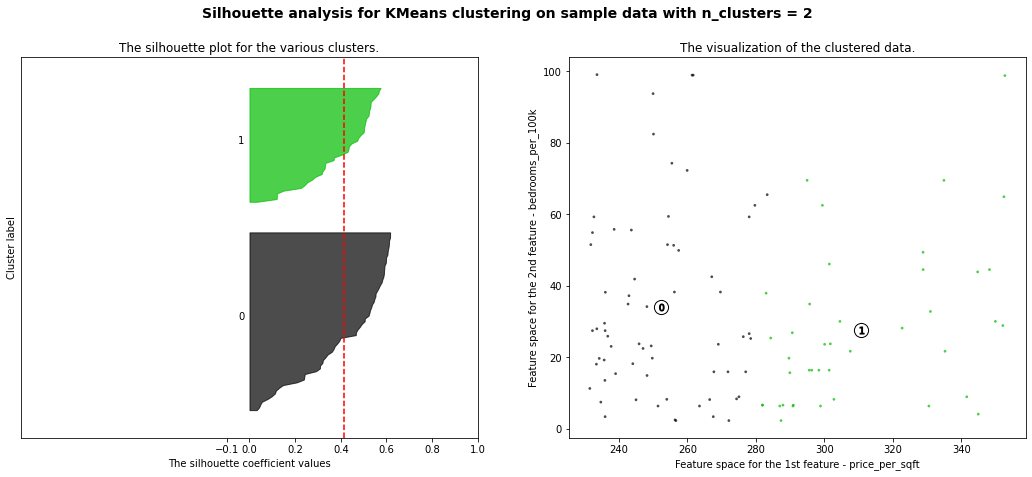

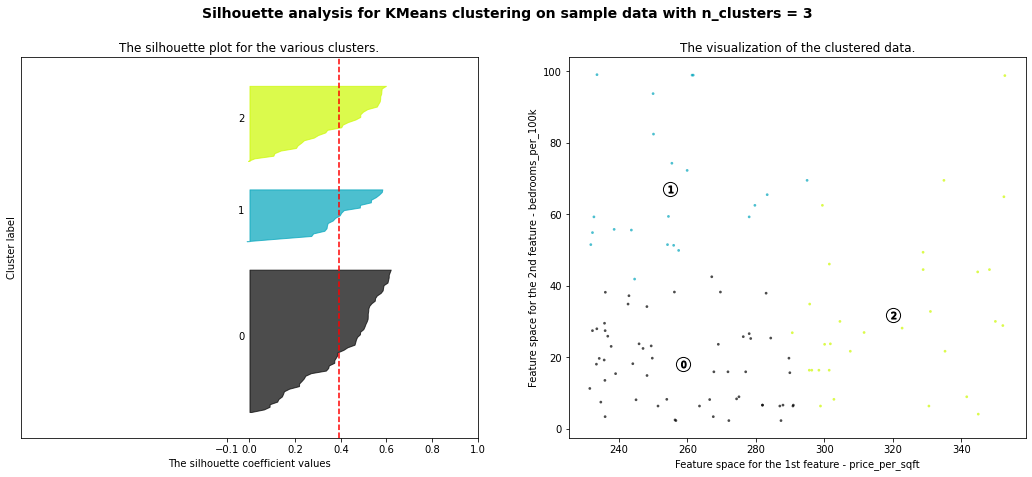

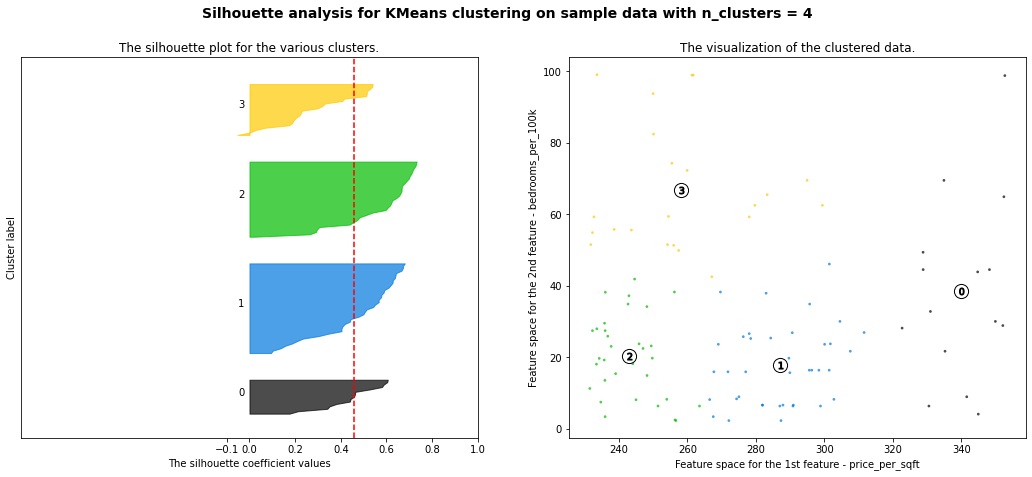

In [ ]:
# Selecting number of clusters through the silhouette analysis on Kmeans clustering
range_n_clusters = [2, 3, 4]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-1, 1])
    
    ax1.set_ylim([0, len(extracted_data11) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(extracted_data11)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(extracted_data11, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
     # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(extracted_data11, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

    ax2.scatter(extracted_data11.price_per_sqft, extracted_data11.school_rank, marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature - price_per_sqft")
    ax2.set_ylabel("Feature space for the 2nd feature - bedrooms_per_100k")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Between cluster size 3 and 4, number of clusters = 4 provides the Golden Cluster which is Cluster no 2. Shown below in yellow marked 2.

In [ ]:
#Apply KMeans with number of clusters as 4
kmeans = KMeans(n_clusters=4)
cluster_labels = kmeans.fit_predict(extracted_data11)
y_kmeans2 = kmeans.predict(extracted_data11)

Text(0.5, 0.98, 'KMeans clustering on sample data with n_clusters = 4')

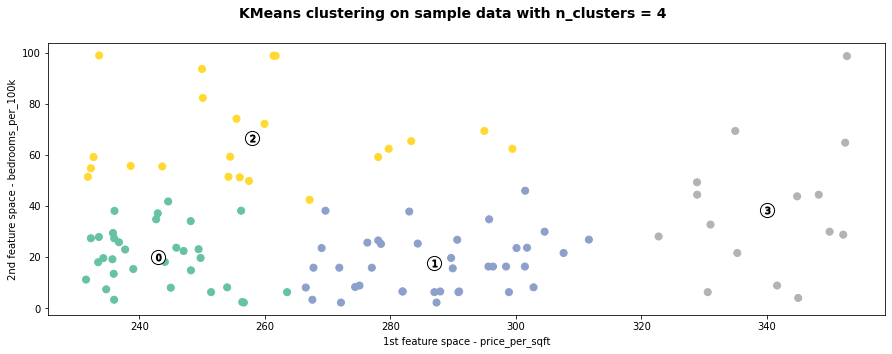

In [ ]:
plt.scatter(extracted_data11.price_per_sqft, extracted_data11.school_rank, c=y_kmeans2, s=50, cmap='Set2')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
        # ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        plt.scatter(c[0], c[1], marker='$%d$' % i, s=50, alpha=1, edgecolor='k', );

plt.xlabel("1st feature space - price_per_sqft")
plt.ylabel("2nd feature space - bedrooms_per_100k")
plt.suptitle(("KMeans clustering on sample data "
                  "with n_clusters = 4"),
                 fontsize=14, fontweight='bold')

In [ ]:
extracted_data11['cluster'] = cluster_labels

extracted_data111 = extracted_data11.loc[extracted_data11['cluster'] == 2]

print(extracted_data111)

     price_per_sqft  school_rank  cluster
41       250.000000    93.788235        2
42       256.007690    51.341176        2
54       238.622159    55.805882        2
91       254.210104    51.535294        2
103      231.802426    51.535294        2
108      278.069904    59.300000        2
240      250.116009    82.464706        2
249      232.291667    54.900000        2
286      267.140468    42.541176        2
291      261.724138    98.964706        2
360      254.487180    59.429412        2
415      232.712766    59.300000        2
435      261.389522    98.964706        2
450      283.333333    65.511765        2
466      294.989624    69.523529        2
498      259.951259    72.305882        2
529      255.488267    74.311765        2
599      257.466015    49.917647        2
640      243.652344    55.611765        2
692      233.607231    99.094118        2
702      279.740061    62.535294        2
707      299.462366    62.535294        2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
sum_of_sq_dist3 = {}

for k in range(1,10):
  km = KMeans(n_clusters=k, init= 'k-means++', max_iter= 1000 )
  km = km.fit(extracted_data111)
  sum_of_sq_dist3[k] = km.inertia_

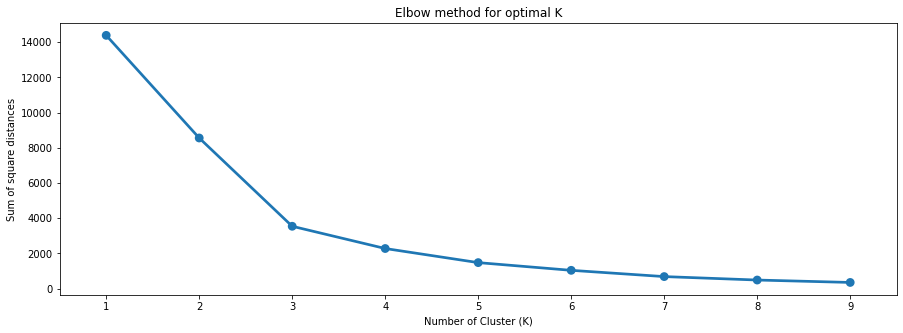

In [ ]:
sns.pointplot(x=list(sum_of_sq_dist3.keys()), y= list(sum_of_sq_dist3.values()))
plt.xlabel("Number of Cluster (K)")
plt.ylabel("Sum of square distances")
plt.title("Elbow method for optimal K")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2)
cluster_labels = kmeans.fit_predict(extracted_data111)
y_kmeans3 = kmeans.predict(extracted_data111)

Text(0.5, 0.98, 'KMeans clustering on sample data with n_clusters = 2')

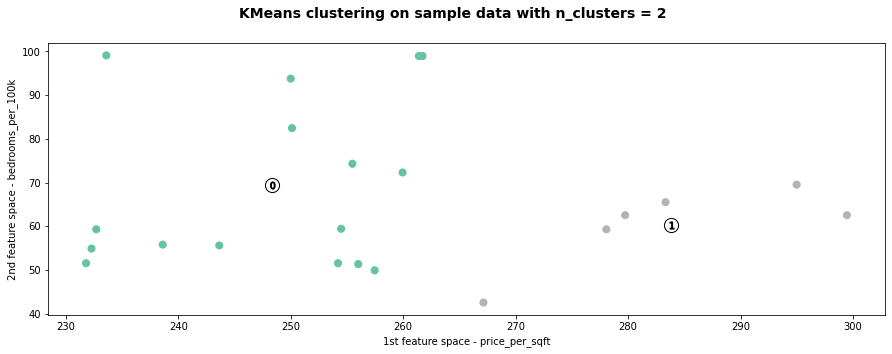

In [ ]:
plt.scatter(extracted_data111.price_per_sqft, extracted_data111.school_rank, c=y_kmeans3, s=50, cmap='Set2')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
        plt.scatter(c[0], c[1], marker='$%d$' % i, s=50, alpha=1, edgecolor='k', );

plt.xlabel("1st feature space - price_per_sqft")
plt.ylabel("2nd feature space - bedrooms_per_100k")
plt.suptitle(("KMeans clustering on sample data "
                  "with n_clusters = 2"),
                 fontsize=14, fontweight='bold')

In [ ]:
extracted_data111['cluster'] = cluster_labels

extracted_data_golden = extracted_data111.loc[extracted_data111['cluster'] == 1]

print(extracted_data_golden)

     price_per_sqft  school_rank  cluster
108      278.069904    59.300000        1
286      267.140468    42.541176        1
450      283.333333    65.511765        1
466      294.989624    69.523529        1
702      279.740061    62.535294        1
707      299.462366    62.535294        1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
extracted_data_golden.describe()

,price_per_sqft,school_rank,cluster
count,6.000000,6.000000,6.0
mean,283.789293,60.324510,1.0
std,11.811787,9.365909,0.0
min,267.140468,42.541176,1.0
25%,278.487443,60.108824,1.0
50%,281.536697,62.535294,1.0
75%,292.075551,64.767647,1.0
max,299.462366,69.523529,1.0


In [ ]:
reg_data = merged_df.copy()

## **Different Regression Models Score With Latent Variable**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import time

names = ['Linear Regression', 'RandomForest Regessor', 'MLP Regressor', 'KNeighbors Regressor',
          'GradientBoosting Regressor', 'Support Vector Machine (SVR)']
regressors = [LinearRegression(),
               RandomForestRegressor(max_depth=2,random_state=1),
               MLPRegressor(random_state=1, max_iter=1000),
               KNeighborsRegressor(n_neighbors=100),
               GradientBoostingRegressor(random_state=1),
               SVR(C=1.0, epsilon=0.02)]

X = reg_data[['school_rank','area']]
y = reg_data['price']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.2)

max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, regressors):
    start_time = time.time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    print('Regression Model = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Regression Model = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

Regression Model = Linear Regression, Score (test, accuracy) = 76.39, Training time = 0.00 seconds
Regression Model = RandomForest Regessor, Score (test, accuracy) = 89.65, Training time = 0.16 seconds
Regression Model = MLP Regressor, Score (test, accuracy) = -49.42, Training time = 3.07 seconds
Regression Model = KNeighbors Regressor, Score (test, accuracy) = 14.67, Training time = 0.01 seconds
Regression Model = GradientBoosting Regressor, Score (test, accuracy) = 91.72, Training time = 0.09 seconds
Regression Model = Support Vector Machine (SVR), Score (test, accuracy) = -3.42, Training time = 0.04 seconds
--------------------------------------------------------------------------------
Best --> Regression Model = GradientBoosting Regressor, Score (test, accuracy) = 91.72


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Regression Model = Linear Regression, Score (test, accuracy) = 89.91, Training time = 0.00 seconds
Regression Model = RandomForest Regessor, Score (test, accuracy) = 84.76, Training time = 0.16 seconds
Regression Model = MLP Regressor, Score (test, accuracy) = -50.62, Training time = 3.11 seconds
Regression Model = KNeighbors Regressor, Score (test, accuracy) = 13.02, Training time = 0.01 seconds
Regression Model = GradientBoosting Regressor, Score (test, accuracy) = 74.96, Training time = 0.11 seconds
Regression Model = Support Vector Machine (SVR), Score (test, accuracy) = -4.58, Training time = 0.02 seconds

--------------------------------------------------------------------------------
Best --> Regression Model = Linear Regression, Score (test, accuracy) = 89.91

###**Regression Score Without Latent Variable**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import time

names = ['Linear Regression', 'RandomForest Regessor', 'MLP Regressor', 'KNeighbors Regressor',
          'GradientBoosting Regressor', 'Support Vector Machine (SVR)']
regressors = [LinearRegression(),
               RandomForestRegressor(max_depth=2,random_state=1),
               MLPRegressor(random_state=1, max_iter=1000),
               KNeighborsRegressor(n_neighbors=100),
               GradientBoostingRegressor(random_state=1),
               SVR(C=1.0, epsilon=0.02)]

X = reg_data[['bedrooms','area']]
y = reg_data['price']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.2)

max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, regressors):
    start_time = time.time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    print('Regression Model = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Regression Model = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

Regression Model = Linear Regression, Score (test, accuracy) = 76.12, Training time = 0.00 seconds
Regression Model = RandomForest Regessor, Score (test, accuracy) = 83.72, Training time = 0.17 seconds
Regression Model = MLP Regressor, Score (test, accuracy) = -33.26, Training time = 3.16 seconds
Regression Model = KNeighbors Regressor, Score (test, accuracy) = 11.26, Training time = 0.01 seconds
Regression Model = GradientBoosting Regressor, Score (test, accuracy) = 86.63, Training time = 0.08 seconds
Regression Model = Support Vector Machine (SVR), Score (test, accuracy) = -2.73, Training time = 0.04 seconds
--------------------------------------------------------------------------------
Best --> Regression Model = GradientBoosting Regressor, Score (test, accuracy) = 86.63


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Regression Model = Linear Regression, Score (test, accuracy) = 66.54, Training time = 0.00 seconds
Regression Model = RandomForest Regessor, Score (test, accuracy) = 45.27, Training time = 0.16 seconds
Regression Model = MLP Regressor, Score (test, accuracy) = -193.36, Training time = 3.09 seconds
Regression Model = KNeighbors Regressor, Score (test, accuracy) = 35.73, Training time = 0.01 seconds
Regression Model = GradientBoosting Regressor, Score (test, accuracy) = 47.40, Training time = 0.08 seconds
Regression Model = Support Vector Machine (SVR), Score (test, accuracy) = -6.44, Training time = 0.03 seconds

--------------------------------------------------------------------------------
Best --> Regression Model = Linear Regression, Score (test, accuracy) = 66.54

###**We notice that the Regression Score with latent variable is high compared to without any latent variable**

**Score with Latent Variable** = Linear Regression, Score (test, accuracy) = 89.91

**Score without Latent Variable** =  Linear Regression, Score (test, accuracy) = 66.54

##**Linear Regression**

###**Applying Linear Regression from scikit learn on the latent variables and calculating the coefficients**

**Calculated the coefficients and intercept values and stored them in a variable for later uses.**

In [ ]:
from sklearn import linear_model
reg_algo = linear_model.LinearRegression()
reg_algo.fit(reg_data[['school_rank','area']], reg_data.price)
arr1 = reg_algo.coef_
c1 = arr1[0]
c2 = arr1[1]
arr1

array([114.49565544, 355.91010453])

In [ ]:
intercept = reg_algo.intercept_
intercept

-413951.3399588899

**Predicting the house price based on the feature and the latent variable**

In [ ]:
reg_algo.predict([[4,2300]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([405099.88307822])

**Cross verification done by manually calculating the prediction**

**ax1 + bx2 + cx3 + dx4 + z**

In [ ]:
c1*3 + c2*2200 + intercept

369394.376969937

###**Plotting the linear regression on the graph**

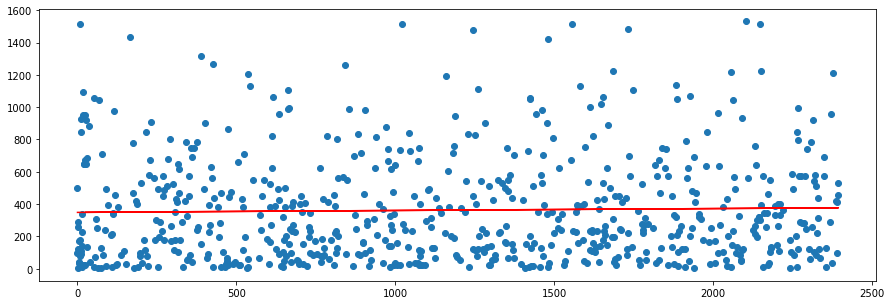

In [ ]:
X = merged_df.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = merged_df.iloc[:, 9].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
# split into input (X) and output (y) variables
X = merged_df['school_rank']
Y = merged_df['price_per_sqft']
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
68/68 [==============================] - 1s 3ms/step - loss: -1470452.0000 - accuracy: 0.0000e+00
Epoch 2/150
68/68 [==============================] - 0s 2ms/step - loss: -1526243.1250 - accuracy: 0.0000e+00
Epoch 3/150
68/68 [==============================] - 0s 2ms/step - loss: -1545601.2500 - accuracy: 0.0000e+00
Epoch 4/150
68/68 [==============================] - 0s 3ms/step - loss: -1552615.7500 - accuracy: 0.0000e+00
Epoch 5/150
68/68 [==============================] - 0s 3ms/step - loss: -1559994.2500 - accuracy: 0.0000e+00
Epoch 6/150
68/68 [==============================] - 0s 3ms/step - loss: -1567212.6250 - accuracy: 0.0000e+00
Epoch 7/150
68/68 [==============================] - 0s 3ms/step - loss: -1572000.1250 - accuracy: 0.0000e+00
Epoch 8/150
68/68 [==============================] - 0s 2ms/step - loss: -1573201.2500 - accuracy: 0.0000e+00
Epoch 9/150
68/68 [==============================] - 0s 2ms/step - loss: -1578703.2500 - accuracy: 0.0000e+00
Epoch 10/1

###**Root mean squared value**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
X =  StandardScaler().fit_transform(merged_df[['price_per_sqft']])
y = merged_df['price']
X_train, X_test = X[0:int(len(X)*0.8)], X[int(len(X)*0.8):]
y_train, y_test = y[0:int(len(y)*0.8)], y[int(len(y)*0.8):]
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_reg = linear_reg.predict(X_test)
lr_score = "R^2: {}".format(linear_reg.score(X_test, y_test))
print(lr_score)
rmse_reg = np.sqrt(mean_squared_error(y_test, y_pred_reg))
print("Root Mean Squared Error: {}".format(rmse_reg))
print("Mean absolute error: {}".format(mean_absolute_error(y_test, y_pred_reg)))

R^2: 0.2564666135192596
Root Mean Squared Error: 389770.0949085235
Mean absolute error: 166325.41964947156


##**Findings**

1. In texas, the price of the houses with square feet area ranging between 2100 to 2500 sqft cost between 310k to 340k. 

2. The house price prediction becomes more accuarate when we introduced the latent variables from a different dataset. 

3. The Regression score was better when we ran it with the latent variables. The variance of the data got improved.

4. It can be concluded that the house prices goes high when the school ranking is better which means as the school popularity increases, the poperty prices increases.

5. Through fractal clustering, we found that there are properties with number 15 that has low price per square feet with high school ranking that would be an ideal buy for any investor.



##**Conclusion**

Any investor who is interested in buying a property in Texas, can easily find a house ranging between 310 - 340k with a square feet area of around 2400 and with a *high* school ranking.